In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%

%load_ext autoreload
%autoreload 2



In [ ]:
# default_exp core


 # module name here

 > API details.

In [ ]:
#hide
from nbdev.showdoc import *



In [ ]:
from fastai2.tabular.all import *
from fastai2.vision.all import *
from fastai2.data.load import _FakeLoader, _loaders
import pandas as pd
from torch.utils.tensorboard import SummaryWriter
import datetime



In [ ]:
from fastai2.data.load import _FakeLoader, _loaders
class MixedDL():
    def __init__(self, tab_dl:TabDataLoader, vis_dl:TfmdDL, device='cuda:0'):
        "Stores away `tab_dl` and `vis_dl`, and overrides `shuffle_fn`"
        self.device = device
        tab_dl.shuffle_fn = self.shuffle_fn
        vis_dl.shuffle_fn = self.shuffle_fn
        self.dls = [tab_dl, vis_dl]
        self.count = 0
        self.fake_l = _FakeLoader(self, False, 0, 0)



In [ ]:
@patch
def shuffle_fn(x:MixedDL, idxs):
        "Generates a new `rng` based upon which `DataLoader` is called"
        if x.count == 0: # if we haven't generated an rng yet
            x.rng = x.dls[0].rng.sample(idxs, len(idxs))
            x.count += 1
            return x.rng
        else:
            x.count = 0
            return x.rng

@patch
def __iter__(dl:MixedDL):
        "Iterate over your `DataLoader`"
        z = zip(*[_loaders[i.fake_l.num_workers==0](i.fake_l) for i in dl.dls])
        for b in z:
            if dl.device is not None:
                b = to_device(b, dl.device)
            batch = []
            batch.extend(dl.dls[0].after_batch(b[0])[:2]) # tabular cat and cont
            batch.append(dl.dls[1].after_batch(b[1][0])) # Image
            batch.append(b[1][1]) # y
            yield tuple(batch)

@patch
def one_batch(x:MixedDL):
        "Grab a batch from the `DataLoader`"
        with x.fake_l.no_multiproc(): res = first(x)
        if hasattr(x, 'it'): delattr(x, 'it')
        return res

@patch
def __len__(x:MixedDL): return len(x.dls[0])

@patch
def to(x:MixedDL, device): x.device = device

@patch
def show_batch(x:MixedDL):
    "Show a batch from multiple `DataLoaders`"
    for dl in x.dls:
        dl.show_batch()

@patch
def show_results(x:MixedDL,b,out,**kwargs):
    "Show a batch from multiple `DataLoaders`"
    for i,dl in enumerate(x.dls):
        if i == 0:
            dl.show_results(b=b[:2]+(b[3],),out=out,**kwargs)
        else:
            dl.show_results(b=b[2:],out=out,**kwargs)

@patch
def new(x:MixedDL,*args,**kwargs):
    "Show a batch from multiple `DataLoaders`"
    new_dls = [dl.new(*args,**kwargs) for dl in x.dls]
    res=MixedDL(*new_dls)
    return res



In [ ]:
path = "/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage"
image_files = get_image_files(path)
tabular_files = get_files(path, extensions=['.csv'])
print(len(image_files))
print(len(tabular_files))



10754
212


In [ ]:
def fileLabeller(o,**kwargs):
    winnerFile = Path(o).parent/"winner.txt"
    if os.path.isfile(winnerFile):
        f = open(winnerFile, "r")
        winner = f.readline()
        f.close()
    else:
        winner="na"
    return winner

print(image_files[0])
print(fileLabeller(image_files[0]))



/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage/6/ct_2_t_3/output_map16.jpg
ct


In [ ]:
columns = ["t_1","t_2","t_3","t_4","t_5","ct_1","ct_2","ct_3","ct_4","ct_5","t_1_mainweapon", "t_1_secweapon", "t_1_flashbangs", "t_1_hassmoke", "t_1_hasmolotov", "t_1_hashe", "t_1_armor", "t_1_hashelmet", "t_1_hasc4",
		"t_2_mainweapon", "t_2_secweapon", "t_2_flashbangs", "t_2_hassmoke", "t_2_hasmolotov", "t_2_hashe", "t_2_armor", "t_2_hashelmet", "t_2_hasc4",
		"t_3_mainweapon", "t_3_secweapon", "t_3_flashbangs", "t_3_hassmoke", "t_3_hasmolotov", "t_3_hashe", "t_3_armor", "t_3_hashelmet", "t_3_hasc4",
		"t_4_mainweapon", "t_4_secweapon", "t_4_flashbangs", "t_4_hassmoke", "t_4_hasmolotov", "t_4_hashe", "t_4_armor", "t_4_hashelmet", "t_4_hasc4",
		"t_5_mainweapon", "t_5_secweapon", "t_5_flashbangs", "t_5_hassmoke", "t_5_hasmolotov", "t_5_hashe", "t_5_armor", "t_5_hashelmet", "t_5_hasc4",
		"ct_1_mainweapon", "ct_1_secweapon", "ct_1_flashbangs", "ct_1_hassmoke", "ct_1_hasmolotov", "ct_1_hashe", "ct_1_armor", "ct_1_hashelmet", "ct_1_hasdefusekit",
		"ct_2_mainweapon", "ct_2_secweapon", "ct_2_flashbangs", "ct_2_hassmoke", "ct_2_hasmolotov", "ct_2_hashe", "ct_2_armor", "ct_2_hashelmet", "ct_2_hasdefusekit",
		"ct_3_mainweapon", "ct_3_secweapon", "ct_3_flashbangs", "ct_3_hassmoke", "ct_3_hasmolotov", "ct_3_hashe", "ct_3_armor", "ct_3_hashelmet", "ct_3_hasdefusekit",
		"ct_4_mainweapon", "ct_4_secweapon", "ct_4_flashbangs", "ct_4_hassmoke", "ct_4_hasmolotov", "ct_4_hashe", "ct_4_armor", "ct_4_hashelmet", "ct_4_hasdefusekit",
		"ct_5_mainweapon", "ct_5_secweapon", "ct_5_flashbangs", "ct_5_hassmoke", "ct_5_hasmolotov", "ct_5_hashe", "ct_5_armor", "ct_5_hashelmet", "ct_5_hasdefusekit",
        'related_image','winner']
full_csv = pd.DataFrame(columns=columns)
for tab_file in tabular_files:
    if not os.stat(tab_file).st_size == 0 and os.path.isfile(tab_file.parent/"winner.txt"):
        new_csv = pd.read_csv(tab_file)
        new_csv['index']=new_csv.index
        new_csv['related_image'] = str(tab_file.parent)+"/output_map"+new_csv['index'].astype(str)+".jpg"
        new_csv['winner'] = fileLabeller(tab_file)
        new_csv=new_csv.drop(columns=["index"])
        new_csv.columns=columns
        full_csv=full_csv.append(new_csv)



In [ ]:
filtered_image_files = L()
for image_file in image_files:
    if fileLabeller(image_file) in ["t","ct"] and not os.stat(image_file.parent/"tabular.csv").st_size == 0 and str(image_file) in full_csv['related_image'].values:
        filtered_image_files.append(image_file)



In [ ]:
def roundSplitter(filtered_image_files):
    uniqueList = list(set([Path(o).parent for o in filtered_image_files]))
    splits=RandomSplitter()(uniqueList)
    train_image_files=L()
    valid_image_files=L()
    for i,o in enumerate(filtered_image_files):
        if uniqueList.index(Path(o).parent) in splits[0]:
            train_image_files+=i
        else:
            valid_image_files+=i
    return train_image_files,valid_image_files



In [ ]:
filtered_image_files.sort()
full_csv=full_csv.sort_values(by=['related_image'])
#filtered_image_files=filtered_image_files[:2000]
#full_csv=full_csv.iloc[:2000,:]
splits=roundSplitter(filtered_image_files)



In [ ]:
print(filtered_image_files[55])
full_csv.iloc[55,:]



/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage/10/ct_0_t_1/output_map59.jpg


t_1                                                                                                           0.65
t_2                                                                                                              0
t_3                                                                                                           0.37
t_4                                                                                                              0
t_5                                                                                                              0
                                                                 ...                                              
ct_5_armor                                                                                                       0
ct_5_hashelmet                                                                                                   0
ct_5_hasdefusekit                                                               

In [ ]:
cont_names = ['t_1', 't_2','t_3','t_4','t_5',
    'ct_1','ct_2','ct_3','ct_4','ct_5',
    "t_1_armor","t_2_armor","t_3_armor","t_4_armor","t_5_armor",
    "ct_1_armor","ct_2_armor","ct_3_armor","ct_4_armor","ct_5_armor"]
cat_names = ["t_1_mainweapon", "t_1_secweapon", "t_1_flashbangs", "t_1_hassmoke", "t_1_hasmolotov", "t_1_hashe", "t_1_hashelmet", "t_1_hasc4",
		"t_2_mainweapon", "t_2_secweapon", "t_2_flashbangs", "t_2_hassmoke", "t_2_hasmolotov", "t_2_hashe", "t_2_hashelmet", "t_2_hasc4",
		"t_3_mainweapon", "t_3_secweapon", "t_3_flashbangs", "t_3_hassmoke", "t_3_hasmolotov", "t_3_hashe", "t_3_hashelmet", "t_3_hasc4",
		"t_4_mainweapon", "t_4_secweapon", "t_4_flashbangs", "t_4_hassmoke", "t_4_hasmolotov", "t_4_hashe", "t_4_hashelmet", "t_4_hasc4",
		"t_5_mainweapon", "t_5_secweapon", "t_5_flashbangs", "t_5_hassmoke", "t_5_hasmolotov", "t_5_hashe", "t_5_hashelmet", "t_5_hasc4",
		"ct_1_mainweapon", "ct_1_secweapon", "ct_1_flashbangs", "ct_1_hassmoke", "ct_1_hasmolotov", "ct_1_hashe", "ct_1_hashelmet", "ct_1_hasdefusekit",
		"ct_2_mainweapon", "ct_2_secweapon", "ct_2_flashbangs", "ct_2_hassmoke", "ct_2_hasmolotov", "ct_2_hashe", "ct_2_hashelmet", "ct_2_hasdefusekit",
		"ct_3_mainweapon", "ct_3_secweapon", "ct_3_flashbangs", "ct_3_hassmoke", "ct_3_hasmolotov", "ct_3_hashe", "ct_3_hashelmet", "ct_3_hasdefusekit",
		"ct_4_mainweapon", "ct_4_secweapon", "ct_4_flashbangs", "ct_4_hassmoke", "ct_4_hasmolotov", "ct_4_hashe", "ct_4_hashelmet", "ct_4_hasdefusekit",
		"ct_5_mainweapon", "ct_5_secweapon", "ct_5_flashbangs", "ct_5_hassmoke", "ct_5_hasmolotov", "ct_5_hashe", "ct_5_hashelmet", "ct_5_hasdefusekit"]
for cat in cont_names:
    full_csv[cat]=full_csv[cat].astype(np.float)
procs = [Categorify, Normalize]
dls_tabular = TabularDataLoaders.from_df(full_csv, path, procs=procs, cont_names=cont_names,cat_names=cat_names,
                                 y_names="winner", bs=8,valid_idx=splits[1],device=torch.device('cuda:0'))



In [ ]:

dsets = Datasets(filtered_image_files, [[PILImage.create], [fileLabeller, Categorize]],splits=splits)
item_tfms = [Resize(200),ToTensor]
batch_tfms = [IntToFloatTensor, Normalize.from_stats(*imagenet_stats)]
dls_image = dsets.dataloaders(after_item=item_tfms, after_batch=batch_tfms, bs=8, num_workers=8,device=torch.device("cuda"))



In [ ]:
train_mixed_dl = MixedDL(dls_tabular.train, dls_image.train)
train_mixed_dl.to(torch.device('cuda:0'))
valid_mixed_dl = MixedDL(dls_tabular.valid,dls_image.valid)
valid_mixed_dl.to(torch.device('cuda:0'))
dls = DataLoaders(train_mixed_dl, valid_mixed_dl,device=torch.device('cuda:0'))



In [ ]:
dls_image.one_batch()



(TensorImage([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           ...,
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.0665, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.0837, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.0837, -2.1008]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           ...,
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -1.9832, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0007, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0007, -2.0182]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
        

In [ ]:
dls_tabular.one_batch()



(tensor([[ 1,  2,  1,  1,  1,  1,  1,  2,  6,  2,  3,  2,  2,  1,  2,  1,  6,  2,
           3,  2,  2,  1,  2,  1,  1,  2,  1,  1,  1,  1,  2,  1,  4,  2,  3,  2,
           2,  1,  2,  1,  1,  8,  1,  1,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1,
           1,  1,  1,  7,  1,  1,  1,  1,  1,  1,  1,  8,  1,  1,  1,  1,  1,  1,
           1,  9,  1,  1,  1,  1,  1,  1],
         [ 6,  2,  3,  1,  2,  1,  2,  1,  6,  2,  1,  1,  1,  1,  1,  1,  1,  4,
           1,  1,  1,  1,  1,  1,  6,  2,  1,  1,  1,  1,  2,  1,  1,  4,  1,  1,
           1,  1,  1,  1,  2,  8,  2,  1,  1,  2,  2,  1,  5,  9,  1,  1,  1,  2,
           2,  1, 10,  7,  1,  1,  1,  1,  1,  1,  2,  8,  2,  2,  2,  1,  2,  1,
           2,  9,  1,  2,  2,  2,  2,  1],
         [ 1,  4,  3,  2,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  6,
           1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,
           1,  1,  1,  2, 11,  8,  3,  2,  2,  1,  2,  1,  7,  9,  2,  2,  2,  2,
           2

In [ ]:
b=train_mixed_dl.one_batch()
b



(tensor([[ 6,  2,  3,  2,  2,  1,  2,  1,  6,  2,  3,  2,  2,  1,  2,  1,  6,  2,
           2,  2,  2,  1,  2,  1,  6,  2,  1,  2,  1,  2,  2,  1,  4,  2,  1,  2,
           2,  2,  2,  1,  6,  8,  3,  2,  2,  1,  2,  1, 11,  7,  2,  2,  2,  2,
           2,  1,  6,  7,  2,  2,  2,  2,  2,  1,  6,  8,  2,  2,  2,  2,  2,  1,
          11,  4,  2,  2,  2,  2,  2,  1],
         [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  4,  1,  1,
           1,  1,  2,  2, 11,  5,  3,  2,  2,  1,  2,  1,  7,  9,  1,  1,  1,  1,
           2,  1,  5,  7,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  1],
         [ 1,  1,  1,  1,  1,  1,  1,  1,  6,  2,  1,  1,  2,  1,  2,  1,  6,  2,
           2,  1,  2,  2,  2,  1,  6,  2,  1,  2,  1,  1,  2,  1,  4,  2,  1,  1,
           1,  1,  2,  1,  7,  2,  1,  1,  1,  1,  2,  1,  7,  9,  1,  1,  2,  1,
           1

,t_1_mainweapon,t_1_secweapon,t_1_flashbangs,t_1_hassmoke,t_1_hasmolotov,t_1_hashe,t_1_hashelmet,t_1_hasc4,t_2_mainweapon,t_2_secweapon,t_2_flashbangs,t_2_hassmoke,t_2_hasmolotov,t_2_hashe,t_2_hashelmet,t_2_hasc4,t_3_mainweapon,t_3_secweapon,t_3_flashbangs,t_3_hassmoke,t_3_hasmolotov,t_3_hashe,t_3_hashelmet,t_3_hasc4,t_4_mainweapon,t_4_secweapon,t_4_flashbangs,t_4_hassmoke,t_4_hasmolotov,t_4_hashe,t_4_hashelmet,t_4_hasc4,t_5_mainweapon,t_5_secweapon,t_5_flashbangs,t_5_hassmoke,t_5_hasmolotov,t_5_hashe,t_5_hashelmet,t_5_hasc4,ct_1_mainweapon,ct_1_secweapon,ct_1_flashbangs,ct_1_hassmoke,ct_1_hasmolotov,ct_1_hashe,ct_1_hashelmet,ct_1_hasdefusekit,ct_2_mainweapon,ct_2_secweapon,ct_2_flashbangs,ct_2_hassmoke,ct_2_hasmolotov,ct_2_hashe,ct_2_hashelmet,ct_2_hasdefusekit,ct_3_mainweapon,ct_3_secweapon,ct_3_flashbangs,ct_3_hassmoke,ct_3_hasmolotov,ct_3_hashe,ct_3_hashelmet,ct_3_hasdefusekit,ct_4_mainweapon,ct_4_secweapon,ct_4_flashbangs,ct_4_hassmoke,ct_4_hasmolotov,ct_4_hashe,ct_4_hashelmet,ct_4_hasdefusekit,ct_5_mainweapon,ct_5_secweapon,ct_5_flashbangs,ct_5_hassmoke,ct_5_hasmolotov,ct_5_hashe,ct_5_hashelmet,ct_5_hasdefusekit,t_1,t_2,t_3,t_4,t_5,ct_1,ct_2,ct_3,ct_4,ct_5,t_1_armor,t_2_armor,t_3_armor,t_4_armor,t_5_armor,ct_1_armor,ct_2_armor,ct_3_armor,ct_4_armor,ct_5_armor,winner
0,303,2,2,1,1,0,1,0,303,2,2,1,1,0,1,0,303,2,1,1,1,0,1,0,303,2,0,1,0,1,1,0,303,2,0,1,1,1,1,0,303,9,2,1,1,0,1,0,309,7,1,1,1,1,1,0,304,9,1,1,1,1,1,0,304,9,1,1,1,1,1,0,309,3,1,1,1,1,1,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,100.000000,100.000000,99.999999,1.000000e+02,1.000000e+02,100.000001,99.999999,9.900000e+01,9.800000e+01,100.000000,ct
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,309,4,0,0,0,0,1,1,309,5,2,1,1,0,1,0,304,9,0,0,0,0,1,0,303,9,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.367084e-09,-4.401926e-09,6.086239e-09,-1.003855e-09,1.000000e+00,1.000000e+00,6.600000e-01,1.000000e+00,2.097493e-08,-2.425837e-08,0.000003,-0.000002,0.000001,-4.888134e-07,1.000000e+02,100.000001,94.000000,1.000000e+02,-8.085490e-07,0.000003,ct
2,0,0,0,0,0,0,0,0,303,2,0,0,1,0,1,0,303,2,1,0,1,1,1,0,303,2,0,1,0,0,1,0,303,2,0,0,0,0,1,0,304,1,0,0,0,0,1,0,304,9,0,0,1,0,0,0,309,9,1,0,1,0,1,0,0,0,0,0,0,0,0,0,304,5,0,1,0,0,1,0,-2.367084e-09,1.000000e+00,1.000000e+00,6.700000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.097493e-08,1.000000e+00,0.000003,100.000000,99.999999,8.900000e+01,1.000000e+02,100.000001,99.999999,1.000000e+02,-8.085490e-07,100.000000,ct
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,309,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,308,9,0,1,0,0,1,0,304,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.367084e-09,-4.401926e-09,1.000000e+00,-1.003855e-09,1.873300e-08,1.000000e+00,8.700000e-01,-2.237489e-08,2.097493e-08,-2.425837e-08,0.000003,-0.000002,99.000001,-4.888134e-07,-2.152046e-07,100.000001,97.000001,-4.059739e-07,-8.085490e-07,0.000003,ct
4,0,2,0,0,0,0,0,0,303,2,2,1,1,0,1,0,0,2,0,0,0,0,0,0,303,2,2,1,1,0,1,1,303,3,2,1,1,0,1,0,0,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,9,0,0,0,0,0,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000003,90.000000,0.000001,6.000000e+01,5.700000e+01,-0.000003,0.000001,-4.059739e-07,-8.085490e-07,0.000003,t
5,303,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,309,2,2,0,1,0,1,0,303,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,303,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.200000e-01,-4.401926e-09,6.086239e-09,6.800000e-01,6.700000e-01,6.498475e-09,-8.236334e-09,1.000000e+00,2.097493e-08,-2.425837e-08,95.000000,-0.000002,0.000001,9.200000e+01,8.700000e+01,-0.000003,0.000001,1.000000e+02,-8.085490e-07,0.000003,t
6,0,2,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,3,2,1,0,1,1,0,0,7,0,0,0,0,1,0,303,2,0,0,0,0,0,0,304,9,2,1,1,0,1,0,0,9,1,1,1,1,1,0,304,9,2,1,1,0,1,0,309,4,1,1,1,0,1,0,309,9,2,1,1,0,1,0,1.000000e+00

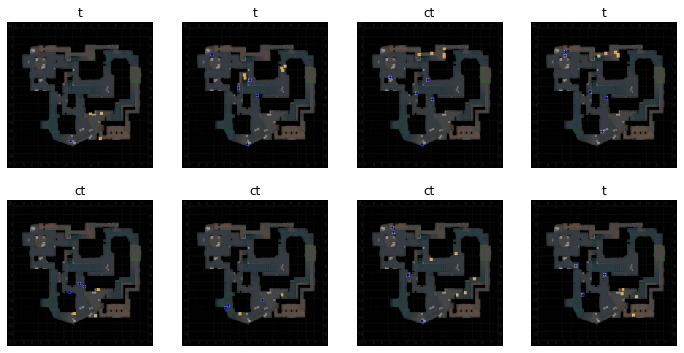

In [ ]:
train_mixed_dl.show_batch()



In [ ]:
class CustomMixedModel(nn.Module):
    def __init__(self, resNet):
        super(CustomMixedModel,self).__init__()
        self.resNet = resNet
        #self.classifier = TabularModel_NoCat(emb_sizes,1536, 30,[400],ps=[0.1],use_bn=False)
        emb_sizes=[(28,7),(10,3),(3,2)]
        self.embeds = nn.ModuleList([Embedding(ni, nf) for ni, nf in emb_sizes])
        #n_emb = sum(e.embedding_dim for e in self.embeds)
        self.intermediate_linear = nn.Sequential(torch.nn.Linear(110,400),nn.ReLU())
        self.classifier=torch.nn.Linear(1400,2)

        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, input_cat,input_cont,input_image):
        main_weapon_fields = L([i*8 for i in range(10)])
        sec_weapon_fields = L([i*8+1 for i in range(10)])
        flash_fields = L([i*8+2] for i in range(10))
        other_fields = [i for i in range(80) if i not in main_weapon_fields+
            sec_weapon_fields+flash_fields]
        main_weapon_input = input_cat[:,main_weapon_fields]
        sec_weapon_input = input_cat[:,sec_weapon_fields]
        flash_input = input_cat[:,flash_fields]
        other_fields = input_cat[:,other_fields]
        main_weapon_input = self.embeds[0](main_weapon_input)
        sec_weapon_input = self.embeds[1](sec_weapon_input)
        flash_input = self.embeds[2](flash_input)
        output_image =self.resNet(input_image)
        output_tabular = self.intermediate_linear(torch.cat((main_weapon_input, sec_weapon_input,
            flash_input,other_fields,input_cont), dim=1))

        output=self.dropout(torch.cat((output_tabular, output_image), dim=1))

        logits = self.classifier(output)
        return logits



In [ ]:
image_model =xresnet34()
image_model.to("cuda:0")
model = CustomMixedModel(image_model)
model = model.to("cuda:0")



In [ ]:
now= datetime.datetime.now()
creation_time = now.strftime("%H:%M")
writer = SummaryWriter( os.path.expanduser('~/projetos/data/csgo_analyze/experiment/tensorboard/')+
                        now.strftime("%Y-%m-%d"))
class TensorboardCallback(Callback):
    def __init__(self,tensorboard_writer,creation_time,lr_sequence,with_input=False,
                 with_loss=True, save_preds=False, save_targs=False, concat_dim=0):
        store_attr(self, "with_input,with_loss,save_preds,save_targs,concat_dim")
        self.tensorboard_writer=tensorboard_writer
        self.count=0
        self.creation_time = creation_time
        self.lr_sequence=lr_sequence

    def begin_batch(self):
        if self.with_input: self.inputs.append((to_detach(self.xb)))

    def begin_validate(self):
        "Initialize containers"
        # self.preds,self.targets = [],[]
        # if self.with_input: self.inputs = []
        if self.with_loss:  
            self.losses = []
            self.accuracy=[]

    def after_batch(self):
        if not self.training:
            "Save predictions, targets and potentially losses"

            # preds,targs = to_detach(self.pred),to_detach(self.yb)
            # if self.save_preds is None: self.preds.append(preds)
            # else: (self.save_preds/str(self.iter)).save_array(preds)
            # if self.save_targs is None: self.targets.append(targs)
            # else: (self.save_targs/str(self.iter)).save_array(targs[0])
            if self.with_loss:
                self.accuracy.append(self.metrics[0].value)
                self.losses.append(to_detach(self.loss))
    def after_validate(self):
        "Concatenate all recorded tensors"
        # if self.with_input:     self.inputs  = detuplify(to_concat(self.inputs, dim=self.concat_dim))
        # if not self.save_preds: self.preds   = detuplify(to_concat(self.preds, dim=self.concat_dim))
        # if not self.save_targs: self.targets = detuplify(to_concat(self.targets, dim=self.concat_dim))

        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" loss: ",self.recorder.log[self.recorder.metric_names.index("valid_loss")],self.count)
        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" accuracy: ",self.recorder.log[self.recorder.metric_names.index("accuracy")],self.count)
        self.count+=1

    def all_tensors(self):
        res = [None if self.save_preds else self.preds, None if self.save_targs else self.targets]
        if self.with_input: res = [self.inputs] + res
        if self.with_loss:  res.append(self.losses)
        return res

lr_sequence = [5e-3,5e-4,5e-5]
tensorboardcb = TensorboardCallback(writer,creation_time,lr_sequence)



In [ ]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy,cbs=[tensorboardcb])



In [ ]:
breakpoint()
for lr in lr_sequence:
    learn.fit_one_cycle(2, lr)



RuntimeError: cuDNN error: CUDNN_STATUS_INTERNAL_ERROR

In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%

%load_ext autoreload
%autoreload 2



In [ ]:
# default_exp core


 # module name here

 > API details.

In [ ]:
#hide
from nbdev.showdoc import *



In [ ]:
from fastai2.tabular.all import *
from fastai2.vision.all import *
from fastai2.data.load import _FakeLoader, _loaders
import pandas as pd
from torch.utils.tensorboard import SummaryWriter
import datetime



In [ ]:
from fastai2.data.load import _FakeLoader, _loaders
class MixedDL():
    def __init__(self, tab_dl:TabDataLoader, vis_dl:TfmdDL, device='cuda:0'):
        "Stores away `tab_dl` and `vis_dl`, and overrides `shuffle_fn`"
        self.device = device
        tab_dl.shuffle_fn = self.shuffle_fn
        vis_dl.shuffle_fn = self.shuffle_fn
        self.dls = [tab_dl, vis_dl]
        self.count = 0
        self.fake_l = _FakeLoader(self, False, 0, 0)



In [ ]:
@patch
def shuffle_fn(x:MixedDL, idxs):
        "Generates a new `rng` based upon which `DataLoader` is called"
        if x.count == 0: # if we haven't generated an rng yet
            x.rng = x.dls[0].rng.sample(idxs, len(idxs))
            x.count += 1
            return x.rng
        else:
            x.count = 0
            return x.rng

@patch
def __iter__(dl:MixedDL):
        "Iterate over your `DataLoader`"
        z = zip(*[_loaders[i.fake_l.num_workers==0](i.fake_l) for i in dl.dls])
        for b in z:
            if dl.device is not None:
                b = to_device(b, dl.device)
            batch = []
            batch.extend(dl.dls[0].after_batch(b[0])[:2]) # tabular cat and cont
            batch.append(dl.dls[1].after_batch(b[1][0])) # Image
            batch.append(b[1][1]) # y
            yield tuple(batch)

@patch
def one_batch(x:MixedDL):
        "Grab a batch from the `DataLoader`"
        with x.fake_l.no_multiproc(): res = first(x)
        if hasattr(x, 'it'): delattr(x, 'it')
        return res

@patch
def __len__(x:MixedDL): return len(x.dls[0])

@patch
def to(x:MixedDL, device): x.device = device

@patch
def show_batch(x:MixedDL):
    "Show a batch from multiple `DataLoaders`"
    for dl in x.dls:
        dl.show_batch()

@patch
def show_results(x:MixedDL,b,out,**kwargs):
    "Show a batch from multiple `DataLoaders`"
    for i,dl in enumerate(x.dls):
        if i == 0:
            dl.show_results(b=b[:2]+(b[3],),out=out,**kwargs)
        else:
            dl.show_results(b=b[2:],out=out,**kwargs)

@patch
def new(x:MixedDL,*args,**kwargs):
    "Show a batch from multiple `DataLoaders`"
    new_dls = [dl.new(*args,**kwargs) for dl in x.dls]
    res=MixedDL(*new_dls)
    return res



In [ ]:
path = "/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage"
image_files = get_image_files(path)
tabular_files = get_files(path, extensions=['.csv'])
print(len(image_files))
print(len(tabular_files))



10754
212


In [ ]:
def fileLabeller(o,**kwargs):
    winnerFile = Path(o).parent/"winner.txt"
    if os.path.isfile(winnerFile):
        f = open(winnerFile, "r")
        winner = f.readline()
        f.close()
    else:
        winner="na"
    return winner

print(image_files[0])
print(fileLabeller(image_files[0]))



/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage/6/ct_2_t_3/output_map16.jpg
ct


In [ ]:
columns = ["t_1","t_2","t_3","t_4","t_5","ct_1","ct_2","ct_3","ct_4","ct_5","t_1_mainweapon", "t_1_secweapon", "t_1_flashbangs", "t_1_hassmoke", "t_1_hasmolotov", "t_1_hashe", "t_1_armor", "t_1_hashelmet", "t_1_hasc4",
		"t_2_mainweapon", "t_2_secweapon", "t_2_flashbangs", "t_2_hassmoke", "t_2_hasmolotov", "t_2_hashe", "t_2_armor", "t_2_hashelmet", "t_2_hasc4",
		"t_3_mainweapon", "t_3_secweapon", "t_3_flashbangs", "t_3_hassmoke", "t_3_hasmolotov", "t_3_hashe", "t_3_armor", "t_3_hashelmet", "t_3_hasc4",
		"t_4_mainweapon", "t_4_secweapon", "t_4_flashbangs", "t_4_hassmoke", "t_4_hasmolotov", "t_4_hashe", "t_4_armor", "t_4_hashelmet", "t_4_hasc4",
		"t_5_mainweapon", "t_5_secweapon", "t_5_flashbangs", "t_5_hassmoke", "t_5_hasmolotov", "t_5_hashe", "t_5_armor", "t_5_hashelmet", "t_5_hasc4",
		"ct_1_mainweapon", "ct_1_secweapon", "ct_1_flashbangs", "ct_1_hassmoke", "ct_1_hasmolotov", "ct_1_hashe", "ct_1_armor", "ct_1_hashelmet", "ct_1_hasdefusekit",
		"ct_2_mainweapon", "ct_2_secweapon", "ct_2_flashbangs", "ct_2_hassmoke", "ct_2_hasmolotov", "ct_2_hashe", "ct_2_armor", "ct_2_hashelmet", "ct_2_hasdefusekit",
		"ct_3_mainweapon", "ct_3_secweapon", "ct_3_flashbangs", "ct_3_hassmoke", "ct_3_hasmolotov", "ct_3_hashe", "ct_3_armor", "ct_3_hashelmet", "ct_3_hasdefusekit",
		"ct_4_mainweapon", "ct_4_secweapon", "ct_4_flashbangs", "ct_4_hassmoke", "ct_4_hasmolotov", "ct_4_hashe", "ct_4_armor", "ct_4_hashelmet", "ct_4_hasdefusekit",
		"ct_5_mainweapon", "ct_5_secweapon", "ct_5_flashbangs", "ct_5_hassmoke", "ct_5_hasmolotov", "ct_5_hashe", "ct_5_armor", "ct_5_hashelmet", "ct_5_hasdefusekit",
        'related_image','winner']
full_csv = pd.DataFrame(columns=columns)
for tab_file in tabular_files:
    if not os.stat(tab_file).st_size == 0 and os.path.isfile(tab_file.parent/"winner.txt"):
        new_csv = pd.read_csv(tab_file)
        new_csv['index']=new_csv.index
        new_csv['related_image'] = str(tab_file.parent)+"/output_map"+new_csv['index'].astype(str)+".jpg"
        new_csv['winner'] = fileLabeller(tab_file)
        new_csv=new_csv.drop(columns=["index"])
        new_csv.columns=columns
        full_csv=full_csv.append(new_csv)



In [ ]:
filtered_image_files = L()
for image_file in image_files:
    if fileLabeller(image_file) in ["t","ct"] and not os.stat(image_file.parent/"tabular.csv").st_size == 0 and str(image_file) in full_csv['related_image'].values:
        filtered_image_files.append(image_file)



In [ ]:
def roundSplitter(filtered_image_files):
    uniqueList = list(set([Path(o).parent for o in filtered_image_files]))
    splits=RandomSplitter()(uniqueList)
    train_image_files=L()
    valid_image_files=L()
    for i,o in enumerate(filtered_image_files):
        if uniqueList.index(Path(o).parent) in splits[0]:
            train_image_files+=i
        else:
            valid_image_files+=i
    return train_image_files,valid_image_files



In [ ]:
filtered_image_files.sort()
full_csv=full_csv.sort_values(by=['related_image'])
#filtered_image_files=filtered_image_files[:2000]
#full_csv=full_csv.iloc[:2000,:]
splits=roundSplitter(filtered_image_files)



In [ ]:
print(filtered_image_files[55])
full_csv.iloc[55,:]



/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage/10/ct_0_t_1/output_map59.jpg


t_1                                                                                                           0.65
t_2                                                                                                              0
t_3                                                                                                           0.37
t_4                                                                                                              0
t_5                                                                                                              0
                                                                 ...                                              
ct_5_armor                                                                                                       0
ct_5_hashelmet                                                                                                   0
ct_5_hasdefusekit                                                               

In [ ]:
cont_names = ['t_1', 't_2','t_3','t_4','t_5',
    'ct_1','ct_2','ct_3','ct_4','ct_5',
    "t_1_armor","t_2_armor","t_3_armor","t_4_armor","t_5_armor",
    "ct_1_armor","ct_2_armor","ct_3_armor","ct_4_armor","ct_5_armor"]
cat_names = ["t_1_mainweapon", "t_1_secweapon", "t_1_flashbangs", "t_1_hassmoke", "t_1_hasmolotov", "t_1_hashe", "t_1_hashelmet", "t_1_hasc4",
		"t_2_mainweapon", "t_2_secweapon", "t_2_flashbangs", "t_2_hassmoke", "t_2_hasmolotov", "t_2_hashe", "t_2_hashelmet", "t_2_hasc4",
		"t_3_mainweapon", "t_3_secweapon", "t_3_flashbangs", "t_3_hassmoke", "t_3_hasmolotov", "t_3_hashe", "t_3_hashelmet", "t_3_hasc4",
		"t_4_mainweapon", "t_4_secweapon", "t_4_flashbangs", "t_4_hassmoke", "t_4_hasmolotov", "t_4_hashe", "t_4_hashelmet", "t_4_hasc4",
		"t_5_mainweapon", "t_5_secweapon", "t_5_flashbangs", "t_5_hassmoke", "t_5_hasmolotov", "t_5_hashe", "t_5_hashelmet", "t_5_hasc4",
		"ct_1_mainweapon", "ct_1_secweapon", "ct_1_flashbangs", "ct_1_hassmoke", "ct_1_hasmolotov", "ct_1_hashe", "ct_1_hashelmet", "ct_1_hasdefusekit",
		"ct_2_mainweapon", "ct_2_secweapon", "ct_2_flashbangs", "ct_2_hassmoke", "ct_2_hasmolotov", "ct_2_hashe", "ct_2_hashelmet", "ct_2_hasdefusekit",
		"ct_3_mainweapon", "ct_3_secweapon", "ct_3_flashbangs", "ct_3_hassmoke", "ct_3_hasmolotov", "ct_3_hashe", "ct_3_hashelmet", "ct_3_hasdefusekit",
		"ct_4_mainweapon", "ct_4_secweapon", "ct_4_flashbangs", "ct_4_hassmoke", "ct_4_hasmolotov", "ct_4_hashe", "ct_4_hashelmet", "ct_4_hasdefusekit",
		"ct_5_mainweapon", "ct_5_secweapon", "ct_5_flashbangs", "ct_5_hassmoke", "ct_5_hasmolotov", "ct_5_hashe", "ct_5_hashelmet", "ct_5_hasdefusekit"]
for cat in cont_names:
    full_csv[cat]=full_csv[cat].astype(np.float)
procs = [Categorify, Normalize]
dls_tabular = TabularDataLoaders.from_df(full_csv, path, procs=procs, cont_names=cont_names,cat_names=cat_names,
                                 y_names="winner", bs=8,valid_idx=splits[1],device=torch.device('cuda:0'))



In [ ]:

dsets = Datasets(filtered_image_files, [[PILImage.create], [fileLabeller, Categorize]],splits=splits)
item_tfms = [Resize(200),ToTensor]
batch_tfms = [IntToFloatTensor, Normalize.from_stats(*imagenet_stats)]
dls_image = dsets.dataloaders(after_item=item_tfms, after_batch=batch_tfms, bs=8, num_workers=8,device=torch.device("cuda"))



In [ ]:
train_mixed_dl = MixedDL(dls_tabular.train, dls_image.train)
train_mixed_dl.to(torch.device('cuda:0'))
valid_mixed_dl = MixedDL(dls_tabular.valid,dls_image.valid)
valid_mixed_dl.to(torch.device('cuda:0'))
dls = DataLoaders(train_mixed_dl, valid_mixed_dl,device=torch.device('cuda:0'))



In [ ]:
dls_image.one_batch()



(TensorImage([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           ...,
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.0665, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.0837, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.0837, -2.1008]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           ...,
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -1.9832, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0007, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0007, -2.0182]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
        

In [ ]:
dls_tabular.one_batch()



(tensor([[ 9,  2,  1,  1,  1,  1,  1,  1,  6,  2,  1,  1,  1,  1,  2,  2,  4,  2,
           1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  2,  2,  2,
           1,  1,  2,  1,  8,  7,  2,  1,  2,  1,  2,  1,  6,  9,  3,  2,  1,  1,
           2,  1, 10,  6,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  1],
         [ 9,  2,  2,  1,  1,  1,  1,  1,  6,  2,  2,  1,  1,  1,  2,  1,  3,  2,
           2,  1,  1,  1,  2,  1,  6,  2,  3,  2,  1,  1,  2,  1,  4,  2,  1,  1,
           2,  1,  2,  2,  6,  4,  3,  1,  1,  1,  2,  1,  7,  9,  2,  2,  1,  1,
           2,  1, 10,  2,  3,  2,  2,  1,  2,  1,  6,  8,  1,  2,  2,  1,  1,  1,
           8,  9,  1,  2,  2,  2,  2,  1],
         [ 6,  2,  2,  2,  2,  1,  2,  1,  4,  2,  3,  2,  1,  1,  2,  1,  6,  2,
           1,  1,  1,  1,  1,  1,  6,  2,  1,  1,  1,  1,  2,  1,  4,  2,  3,  2,
           1,  1,  2,  2,  7,  8,  2,  2,  1,  2,  2,  1,  6,  4,  1,  2,  2,  2,
           2

In [ ]:
b=train_mixed_dl.one_batch()
b



(tensor([[ 1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,
           1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  4,  2,  1,  2,
           2,  1,  2,  1, 11,  8,  2,  1,  1,  2,  1,  1,  1,  9,  1,  1,  1,  1,
           1,  1,  1,  6,  2,  2,  1,  1,  1,  1,  1,  8,  1,  1,  1,  1,  1,  1,
           1,  9,  1,  1,  1,  1,  1,  1],
         [ 9,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  2,  3,  1,
           1,  1,  2,  1,  7,  8,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  1],
         [ 1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,
           1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
           1,  1,  1,  1,  2,  8,  2,  2,  2,  2,  2,  1,  8,  9,  1,  2,  1,  1,
           2

,t_1_mainweapon,t_1_secweapon,t_1_flashbangs,t_1_hassmoke,t_1_hasmolotov,t_1_hashe,t_1_hashelmet,t_1_hasc4,t_2_mainweapon,t_2_secweapon,t_2_flashbangs,t_2_hassmoke,t_2_hasmolotov,t_2_hashe,t_2_hashelmet,t_2_hasc4,t_3_mainweapon,t_3_secweapon,t_3_flashbangs,t_3_hassmoke,t_3_hasmolotov,t_3_hashe,t_3_hashelmet,t_3_hasc4,t_4_mainweapon,t_4_secweapon,t_4_flashbangs,t_4_hassmoke,t_4_hasmolotov,t_4_hashe,t_4_hashelmet,t_4_hasc4,t_5_mainweapon,t_5_secweapon,t_5_flashbangs,t_5_hassmoke,t_5_hasmolotov,t_5_hashe,t_5_hashelmet,t_5_hasc4,ct_1_mainweapon,ct_1_secweapon,ct_1_flashbangs,ct_1_hassmoke,ct_1_hasmolotov,ct_1_hashe,ct_1_hashelmet,ct_1_hasdefusekit,ct_2_mainweapon,ct_2_secweapon,ct_2_flashbangs,ct_2_hassmoke,ct_2_hasmolotov,ct_2_hashe,ct_2_hashelmet,ct_2_hasdefusekit,ct_3_mainweapon,ct_3_secweapon,ct_3_flashbangs,ct_3_hassmoke,ct_3_hasmolotov,ct_3_hashe,ct_3_hashelmet,ct_3_hasdefusekit,ct_4_mainweapon,ct_4_secweapon,ct_4_flashbangs,ct_4_hassmoke,ct_4_hasmolotov,ct_4_hashe,ct_4_hashelmet,ct_4_hasdefusekit,ct_5_mainweapon,ct_5_secweapon,ct_5_flashbangs,ct_5_hassmoke,ct_5_hasmolotov,ct_5_hashe,ct_5_hashelmet,ct_5_hasdefusekit,t_1,t_2,t_3,t_4,t_5,ct_1,ct_2,ct_3,ct_4,ct_5,t_1_armor,t_2_armor,t_3_armor,t_4_armor,t_5_armor,ct_1_armor,ct_2_armor,ct_3_armor,ct_4_armor,ct_5_armor,winner
0,0,2,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,303,2,0,1,1,0,1,0,309,9,1,0,0,1,0,0,0,9,0,0,0,0,0,0,0,8,1,1,0,0,0,0,0,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000003,0.000001,-8.038410e-07,-0.000002,100.000001,57.000000,-0.000003,99.999999,0.000002,-2.579327e-07,t
1,309,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,303,2,2,0,0,0,1,0,304,9,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.000000e-01,1.138545e-09,-8.679145e-09,-1.285451e-08,1.000000e+00,1.0,1.893834e-08,4.618840e-09,-2.249902e-08,-3.210115e-09,100.000000,0.000001,-8.038410e-07,-0.000002,100.000001,99.000001,-0.000003,-0.000002,0.000002,-2.579327e-07,t
2,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,102,9,1,1,1,1,1,0,305,9,0,1,0,0,1,0,102,9,0,1,1,1,1,0,305,9,0,1,0,0,1,0,102,9,0,0,0,0,1,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000003,0.000001,-8.038410e-07,-0.000002,-0.000001,100.000000,99.999999,99.999999,100.000001,1.000000e+02,ct
3,303,2,0,0,1,1,1,0,303,2,2,1,1,0,1,0,303,2,0,0,0,0,1,1,303,2,0,0,1,1,1,0,303,2,1,1,0,0,1,0,304,9,0,0,0,0,1,0,304,9,0,0,0,0,0,0,309,3,2,0,1,0,1,0,304,4,1,0,0,1,1,0,309,1,1,0,0,0,1,0,1.000000e+00,1.000000e+00,1.000000e+00,9.500000e-01,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,100.000000,100.000000,1.000000e+02,100.000000,100.000001,100.000000,99.999999,75.000000,100.000001,1.000000e+02,ct
4,303,2,0,0,0,0,1,1,0,4,1,1,1,0,1,0,303,2,2,0,1,0,1,0,303,4,0,0,0,0,1,0,309,2,0,0,0,0,0,0,308,9,2,1,1,0,1,0,303,4,2,1,0,0,1,0,102,4,0,1,0,1,1,0,102,4,0,1,1,0,1,0,303,4,0,0,1,0,1,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,100.000000,100.000000,1.000000e+02,100.000000,100.000001,100.000000,99.999999,99.999999,100.000001,1.000000e+02,t
5,303,9,1,0,0,0,1,0,104,9,0,0,1,0,1,1,301,2,1,0,0,0,1,0,104,2,1,1,0,1,1,0,303,2,0,0,0,0,1,0,0,5,1,1,0,0,1,0,0,4,0,1,0,0,1,0,0,4,0,0,0,0,1,0,0,4,1,0,0,0,1,0,102,9,0,0,0,0,1,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,100.000000,100.000000,1.000000e+02,100.000000,100.000001,100.000000,99.999999,99.999999,100.000001,1.000000e+02,t
6,0,0,0,0,0,0,0,0,303,2,0,0,0,0,1,0,309,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,308,9,0,1,0,0,1,0,304,9,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.051098e-08,9.400000e-01,1.000000e+00,-1.285451e-08,-1.834134e-08,1.0,1.000000e+00,4.618840e-

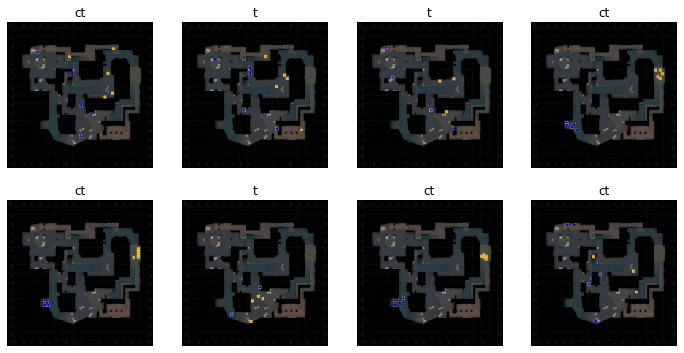

In [ ]:
train_mixed_dl.show_batch()



In [ ]:
class CustomMixedModel(nn.Module):
    def __init__(self, resNet):
        super(CustomMixedModel,self).__init__()
        self.resNet = resNet
        #self.classifier = TabularModel_NoCat(emb_sizes,1536, 30,[400],ps=[0.1],use_bn=False)
        emb_sizes=[(30,7),(11,3),(4,2)]
        self.embeds = nn.ModuleList([Embedding(ni, nf) for ni, nf in emb_sizes])
        #n_emb = sum(e.embedding_dim for e in self.embeds)
        self.intermediate_linear = nn.Sequential(torch.nn.Linear(110,400),nn.ReLU())
        self.classifier=torch.nn.Linear(1400,2)

        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, input_cat,input_cont,input_image):
        main_weapon_fields = L([i*8 for i in range(10)])
        sec_weapon_fields = L([i*8+1 for i in range(10)])
        flash_fields = L([i*8+2] for i in range(10))
        other_fields = [i for i in range(80) if i not in main_weapon_fields+
            sec_weapon_fields+flash_fields]
        main_weapon_input = input_cat[:,main_weapon_fields]
        sec_weapon_input = input_cat[:,sec_weapon_fields]
        flash_input = input_cat[:,flash_fields]
        other_fields = input_cat[:,other_fields]
        main_weapon_input = self.embeds[0](main_weapon_input)
        sec_weapon_input = self.embeds[1](sec_weapon_input)
        flash_input = self.embeds[2](flash_input)
        output_image =self.resNet(input_image)
        output_tabular = self.intermediate_linear(torch.cat((main_weapon_input, sec_weapon_input,
            flash_input,other_fields,input_cont), dim=1))

        output=self.dropout(torch.cat((output_tabular, output_image), dim=1))

        logits = self.classifier(output)
        return logits



In [ ]:
image_model =xresnet34()
image_model.to("cuda:0")
model = CustomMixedModel(image_model)
model = model.to("cuda:0")



In [ ]:
now= datetime.datetime.now()
creation_time = now.strftime("%H:%M")
writer = SummaryWriter( os.path.expanduser('~/projetos/data/csgo_analyze/experiment/tensorboard/')+
                        now.strftime("%Y-%m-%d"))
class TensorboardCallback(Callback):
    def __init__(self,tensorboard_writer,creation_time,lr_sequence,with_input=False,
                 with_loss=True, save_preds=False, save_targs=False, concat_dim=0):
        store_attr(self, "with_input,with_loss,save_preds,save_targs,concat_dim")
        self.tensorboard_writer=tensorboard_writer
        self.count=0
        self.creation_time = creation_time
        self.lr_sequence=lr_sequence

    def begin_batch(self):
        if self.with_input: self.inputs.append((to_detach(self.xb)))

    def begin_validate(self):
        "Initialize containers"
        # self.preds,self.targets = [],[]
        # if self.with_input: self.inputs = []
        if self.with_loss:  
            self.losses = []
            self.accuracy=[]

    def after_batch(self):
        if not self.training:
            "Save predictions, targets and potentially losses"

            # preds,targs = to_detach(self.pred),to_detach(self.yb)
            # if self.save_preds is None: self.preds.append(preds)
            # else: (self.save_preds/str(self.iter)).save_array(preds)
            # if self.save_targs is None: self.targets.append(targs)
            # else: (self.save_targs/str(self.iter)).save_array(targs[0])
            if self.with_loss:
                self.accuracy.append(self.metrics[0].value)
                self.losses.append(to_detach(self.loss))
    def after_validate(self):
        "Concatenate all recorded tensors"
        # if self.with_input:     self.inputs  = detuplify(to_concat(self.inputs, dim=self.concat_dim))
        # if not self.save_preds: self.preds   = detuplify(to_concat(self.preds, dim=self.concat_dim))
        # if not self.save_targs: self.targets = detuplify(to_concat(self.targets, dim=self.concat_dim))

        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" loss: ",self.recorder.log[self.recorder.metric_names.index("valid_loss")],self.count)
        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" accuracy: ",self.recorder.log[self.recorder.metric_names.index("accuracy")],self.count)
        self.count+=1

    def all_tensors(self):
        res = [None if self.save_preds else self.preds, None if self.save_targs else self.targets]
        if self.with_input: res = [self.inputs] + res
        if self.with_loss:  res.append(self.losses)
        return res

lr_sequence = [5e-3,5e-4,5e-5]
tensorboardcb = TensorboardCallback(writer,creation_time,lr_sequence)



In [ ]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy,cbs=[tensorboardcb])



In [ ]:
breakpoint()
for lr in lr_sequence:
    learn.fit_one_cycle(2, lr)



RuntimeError: Expected object of scalar type float but got scalar type long int for sequence element 3.

In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%

%load_ext autoreload
%autoreload 2



In [ ]:
# default_exp core


 # module name here

 > API details.

In [ ]:
#hide
from nbdev.showdoc import *



In [ ]:
from fastai2.tabular.all import *
from fastai2.vision.all import *
from fastai2.data.load import _FakeLoader, _loaders
import pandas as pd
from torch.utils.tensorboard import SummaryWriter
import datetime



In [ ]:
from fastai2.data.load import _FakeLoader, _loaders
class MixedDL():
    def __init__(self, tab_dl:TabDataLoader, vis_dl:TfmdDL, device='cuda:0'):
        "Stores away `tab_dl` and `vis_dl`, and overrides `shuffle_fn`"
        self.device = device
        tab_dl.shuffle_fn = self.shuffle_fn
        vis_dl.shuffle_fn = self.shuffle_fn
        self.dls = [tab_dl, vis_dl]
        self.count = 0
        self.fake_l = _FakeLoader(self, False, 0, 0)



In [ ]:
@patch
def shuffle_fn(x:MixedDL, idxs):
        "Generates a new `rng` based upon which `DataLoader` is called"
        if x.count == 0: # if we haven't generated an rng yet
            x.rng = x.dls[0].rng.sample(idxs, len(idxs))
            x.count += 1
            return x.rng
        else:
            x.count = 0
            return x.rng

@patch
def __iter__(dl:MixedDL):
        "Iterate over your `DataLoader`"
        z = zip(*[_loaders[i.fake_l.num_workers==0](i.fake_l) for i in dl.dls])
        for b in z:
            if dl.device is not None:
                b = to_device(b, dl.device)
            batch = []
            batch.extend(dl.dls[0].after_batch(b[0])[:2]) # tabular cat and cont
            batch.append(dl.dls[1].after_batch(b[1][0])) # Image
            batch.append(b[1][1]) # y
            yield tuple(batch)

@patch
def one_batch(x:MixedDL):
        "Grab a batch from the `DataLoader`"
        with x.fake_l.no_multiproc(): res = first(x)
        if hasattr(x, 'it'): delattr(x, 'it')
        return res

@patch
def __len__(x:MixedDL): return len(x.dls[0])

@patch
def to(x:MixedDL, device): x.device = device

@patch
def show_batch(x:MixedDL):
    "Show a batch from multiple `DataLoaders`"
    for dl in x.dls:
        dl.show_batch()

@patch
def show_results(x:MixedDL,b,out,**kwargs):
    "Show a batch from multiple `DataLoaders`"
    for i,dl in enumerate(x.dls):
        if i == 0:
            dl.show_results(b=b[:2]+(b[3],),out=out,**kwargs)
        else:
            dl.show_results(b=b[2:],out=out,**kwargs)

@patch
def new(x:MixedDL,*args,**kwargs):
    "Show a batch from multiple `DataLoaders`"
    new_dls = [dl.new(*args,**kwargs) for dl in x.dls]
    res=MixedDL(*new_dls)
    return res



In [ ]:
path = "/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage"
image_files = get_image_files(path)
tabular_files = get_files(path, extensions=['.csv'])
print(len(image_files))
print(len(tabular_files))



11950
257


In [ ]:
def fileLabeller(o,**kwargs):
    winnerFile = Path(o).parent/"winner.txt"
    if os.path.isfile(winnerFile):
        f = open(winnerFile, "r")
        winner = f.readline()
        f.close()
    else:
        winner="na"
    return winner

print(image_files[0])
print(fileLabeller(image_files[0]))



/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage/6/ct_2_t_3/output_map16.jpg
ct


In [ ]:
columns = ["t_1","t_2","t_3","t_4","t_5","ct_1","ct_2","ct_3","ct_4","ct_5","t_1_mainweapon", "t_1_secweapon", "t_1_flashbangs", "t_1_hassmoke", "t_1_hasmolotov", "t_1_hashe", "t_1_armor", "t_1_hashelmet", "t_1_hasc4",
		"t_2_mainweapon", "t_2_secweapon", "t_2_flashbangs", "t_2_hassmoke", "t_2_hasmolotov", "t_2_hashe", "t_2_armor", "t_2_hashelmet", "t_2_hasc4",
		"t_3_mainweapon", "t_3_secweapon", "t_3_flashbangs", "t_3_hassmoke", "t_3_hasmolotov", "t_3_hashe", "t_3_armor", "t_3_hashelmet", "t_3_hasc4",
		"t_4_mainweapon", "t_4_secweapon", "t_4_flashbangs", "t_4_hassmoke", "t_4_hasmolotov", "t_4_hashe", "t_4_armor", "t_4_hashelmet", "t_4_hasc4",
		"t_5_mainweapon", "t_5_secweapon", "t_5_flashbangs", "t_5_hassmoke", "t_5_hasmolotov", "t_5_hashe", "t_5_armor", "t_5_hashelmet", "t_5_hasc4",
		"ct_1_mainweapon", "ct_1_secweapon", "ct_1_flashbangs", "ct_1_hassmoke", "ct_1_hasmolotov", "ct_1_hashe", "ct_1_armor", "ct_1_hashelmet", "ct_1_hasdefusekit",
		"ct_2_mainweapon", "ct_2_secweapon", "ct_2_flashbangs", "ct_2_hassmoke", "ct_2_hasmolotov", "ct_2_hashe", "ct_2_armor", "ct_2_hashelmet", "ct_2_hasdefusekit",
		"ct_3_mainweapon", "ct_3_secweapon", "ct_3_flashbangs", "ct_3_hassmoke", "ct_3_hasmolotov", "ct_3_hashe", "ct_3_armor", "ct_3_hashelmet", "ct_3_hasdefusekit",
		"ct_4_mainweapon", "ct_4_secweapon", "ct_4_flashbangs", "ct_4_hassmoke", "ct_4_hasmolotov", "ct_4_hashe", "ct_4_armor", "ct_4_hashelmet", "ct_4_hasdefusekit",
		"ct_5_mainweapon", "ct_5_secweapon", "ct_5_flashbangs", "ct_5_hassmoke", "ct_5_hasmolotov", "ct_5_hashe", "ct_5_armor", "ct_5_hashelmet", "ct_5_hasdefusekit",
        'related_image','winner']
full_csv = pd.DataFrame(columns=columns)
for tab_file in tabular_files:
    if not os.stat(tab_file).st_size == 0 and os.path.isfile(tab_file.parent/"winner.txt"):
        new_csv = pd.read_csv(tab_file)
        new_csv['index']=new_csv.index
        new_csv['related_image'] = str(tab_file.parent)+"/output_map"+new_csv['index'].astype(str)+".jpg"
        new_csv['winner'] = fileLabeller(tab_file)
        new_csv=new_csv.drop(columns=["index"])
        new_csv.columns=columns
        full_csv=full_csv.append(new_csv)



In [ ]:
filtered_image_files = L()
for image_file in image_files:
    if fileLabeller(image_file) in ["t","ct"] and not os.stat(image_file.parent/"tabular.csv").st_size == 0 and str(image_file) in full_csv['related_image'].values:
        filtered_image_files.append(image_file)



In [ ]:
def roundSplitter(filtered_image_files):
    uniqueList = list(set([Path(o).parent for o in filtered_image_files]))
    splits=RandomSplitter()(uniqueList)
    train_image_files=L()
    valid_image_files=L()
    for i,o in enumerate(filtered_image_files):
        if uniqueList.index(Path(o).parent) in splits[0]:
            train_image_files+=i
        else:
            valid_image_files+=i
    return train_image_files,valid_image_files



In [ ]:
filtered_image_files.sort()
full_csv=full_csv.sort_values(by=['related_image'])
#filtered_image_files=filtered_image_files[:2000]
#full_csv=full_csv.iloc[:2000,:]
splits=roundSplitter(filtered_image_files)



In [ ]:
print(filtered_image_files[55])
full_csv.iloc[55,:]



/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage/10/ct_0_t_1/output_map59.jpg


t_1                                                                                                           0.65
t_2                                                                                                              0
t_3                                                                                                           0.37
t_4                                                                                                              0
t_5                                                                                                              0
                                                                 ...                                              
ct_5_armor                                                                                                       0
ct_5_hashelmet                                                                                                   0
ct_5_hasdefusekit                                                               

In [ ]:
cont_names = ['t_1', 't_2','t_3','t_4','t_5',
    'ct_1','ct_2','ct_3','ct_4','ct_5',
    "t_1_armor","t_2_armor","t_3_armor","t_4_armor","t_5_armor",
    "ct_1_armor","ct_2_armor","ct_3_armor","ct_4_armor","ct_5_armor"]
cat_names = ["t_1_mainweapon", "t_1_secweapon", "t_1_flashbangs", "t_1_hassmoke", "t_1_hasmolotov", "t_1_hashe", "t_1_hashelmet", "t_1_hasc4",
		"t_2_mainweapon", "t_2_secweapon", "t_2_flashbangs", "t_2_hassmoke", "t_2_hasmolotov", "t_2_hashe", "t_2_hashelmet", "t_2_hasc4",
		"t_3_mainweapon", "t_3_secweapon", "t_3_flashbangs", "t_3_hassmoke", "t_3_hasmolotov", "t_3_hashe", "t_3_hashelmet", "t_3_hasc4",
		"t_4_mainweapon", "t_4_secweapon", "t_4_flashbangs", "t_4_hassmoke", "t_4_hasmolotov", "t_4_hashe", "t_4_hashelmet", "t_4_hasc4",
		"t_5_mainweapon", "t_5_secweapon", "t_5_flashbangs", "t_5_hassmoke", "t_5_hasmolotov", "t_5_hashe", "t_5_hashelmet", "t_5_hasc4",
		"ct_1_mainweapon", "ct_1_secweapon", "ct_1_flashbangs", "ct_1_hassmoke", "ct_1_hasmolotov", "ct_1_hashe", "ct_1_hashelmet", "ct_1_hasdefusekit",
		"ct_2_mainweapon", "ct_2_secweapon", "ct_2_flashbangs", "ct_2_hassmoke", "ct_2_hasmolotov", "ct_2_hashe", "ct_2_hashelmet", "ct_2_hasdefusekit",
		"ct_3_mainweapon", "ct_3_secweapon", "ct_3_flashbangs", "ct_3_hassmoke", "ct_3_hasmolotov", "ct_3_hashe", "ct_3_hashelmet", "ct_3_hasdefusekit",
		"ct_4_mainweapon", "ct_4_secweapon", "ct_4_flashbangs", "ct_4_hassmoke", "ct_4_hasmolotov", "ct_4_hashe", "ct_4_hashelmet", "ct_4_hasdefusekit",
		"ct_5_mainweapon", "ct_5_secweapon", "ct_5_flashbangs", "ct_5_hassmoke", "ct_5_hasmolotov", "ct_5_hashe", "ct_5_hashelmet", "ct_5_hasdefusekit"]
for cat in cont_names:
    full_csv[cat]=full_csv[cat].astype(np.float)
procs = [Categorify, Normalize]
dls_tabular = TabularDataLoaders.from_df(full_csv, path, procs=procs, cont_names=cont_names,cat_names=cat_names,
                                 y_names="winner", bs=8,valid_idx=splits[1],device=torch.device('cuda:0'))



In [ ]:

dsets = Datasets(filtered_image_files, [[PILImage.create], [fileLabeller, Categorize]],splits=splits)
item_tfms = [Resize(200),ToTensor]
batch_tfms = [IntToFloatTensor, Normalize.from_stats(*imagenet_stats)]
dls_image = dsets.dataloaders(after_item=item_tfms, after_batch=batch_tfms, bs=8, num_workers=8,device=torch.device("cuda"))



In [ ]:
train_mixed_dl = MixedDL(dls_tabular.train, dls_image.train)
train_mixed_dl.to(torch.device('cuda:0'))
valid_mixed_dl = MixedDL(dls_tabular.valid,dls_image.valid)
valid_mixed_dl.to(torch.device('cuda:0'))
dls = DataLoaders(train_mixed_dl, valid_mixed_dl,device=torch.device('cuda:0'))



In [ ]:
dls_image.one_batch()



(TensorImage([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           ...,
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.0665, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.0837, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.0837, -2.1008]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           ...,
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -1.9832, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0007, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0007, -2.0182]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
        

In [ ]:
dls_tabular.one_batch()



(tensor([[ 8,  2,  2,  2,  2,  1,  2,  2,  6,  2,  3,  2,  1,  1,  2,  1,  7,  2,
           2,  2,  1,  1,  2,  1,  8,  3,  2,  2,  1,  1,  2,  1,  4,  2,  3,  2,
           1,  1,  2,  1, 11,  8,  2,  2,  2,  2,  2,  1,  6, 10,  2,  2,  2,  2,
           2,  1,  9,  7,  2,  2,  2,  2,  2,  1,  7,  9,  2,  2,  2,  2,  2,  1,
           7,  9,  2,  2,  2,  2,  2,  1],
         [ 8,  2,  2,  1,  2,  1,  2,  1,  6,  2,  2,  2,  2,  2,  2,  1,  7,  2,
           1,  1,  2,  2,  2,  1,  8,  3,  2,  2,  1,  1,  2,  1,  8,  2,  3,  2,
           2,  1,  2,  2, 12,  8,  3,  2,  1,  1,  2,  1,  7, 10,  2,  2,  2,  2,
           2,  1,  9,  3,  1,  2,  2,  1,  2,  1,  7,  5,  1,  2,  2,  2,  2,  1,
           8,  5,  2,  1,  2,  1,  2,  1],
         [ 8,  2,  3,  1,  2,  1,  2,  1,  6,  2,  2,  1,  2,  1,  2,  2,  1,  1,
           1,  1,  1,  1,  1,  1,  8,  3,  2,  2,  2,  1,  2,  1,  8,  2,  3,  1,
           1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 10,  1,  2,  2,  1,
           2

In [ ]:
b=train_mixed_dl.one_batch()
b



(tensor([[ 4,  3,  1,  1,  1,  1,  2,  1,  6,  2,  1,  1,  1,  1,  2,  1,  7,  2,
           1,  1,  1,  1,  2,  1, 12,  3,  1,  1,  1,  1,  2,  2,  4,  2,  2,  2,
           2,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,
           1,  1, 13,  7,  1,  1,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,
           1,  9,  1,  1,  1,  1,  1,  1],
         [ 8,  2,  3,  2,  2,  1,  2,  1,  6,  4,  3,  2,  2,  1,  2,  2,  1,  2,
           1,  1,  1,  1,  1,  1,  8,  3,  3,  2,  2,  1,  2,  1,  8,  3,  3,  2,
           2,  1,  2,  1,  8,  8,  1,  2,  1,  2,  2,  1, 11, 10,  2,  2,  1,  2,
           1,  1,  9,  7,  2,  2,  2,  2,  2,  1,  7,  9,  2,  2,  2,  2,  1,  1,
           7,  9,  1,  2,  2,  1,  1,  1],
         [ 5,  4,  3,  2,  2,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  3,  4,
           1,  1,  1,  1,  2,  1,  8,  3,  3,  2,  2,  1,  2,  1,  6,  4,  2,  2,
           2,  2,  2,  1,  1,  8,  1,  1,  1,  1,  1,  1,  1,  5,  1,  2,  1,  1,
           1

,t_1_mainweapon,t_1_secweapon,t_1_flashbangs,t_1_hassmoke,t_1_hasmolotov,t_1_hashe,t_1_hashelmet,t_1_hasc4,t_2_mainweapon,t_2_secweapon,t_2_flashbangs,t_2_hassmoke,t_2_hasmolotov,t_2_hashe,t_2_hashelmet,t_2_hasc4,t_3_mainweapon,t_3_secweapon,t_3_flashbangs,t_3_hassmoke,t_3_hasmolotov,t_3_hashe,t_3_hashelmet,t_3_hasc4,t_4_mainweapon,t_4_secweapon,t_4_flashbangs,t_4_hassmoke,t_4_hasmolotov,t_4_hashe,t_4_hashelmet,t_4_hasc4,t_5_mainweapon,t_5_secweapon,t_5_flashbangs,t_5_hassmoke,t_5_hasmolotov,t_5_hashe,t_5_hashelmet,t_5_hasc4,ct_1_mainweapon,ct_1_secweapon,ct_1_flashbangs,ct_1_hassmoke,ct_1_hasmolotov,ct_1_hashe,ct_1_hashelmet,ct_1_hasdefusekit,ct_2_mainweapon,ct_2_secweapon,ct_2_flashbangs,ct_2_hassmoke,ct_2_hasmolotov,ct_2_hashe,ct_2_hashelmet,ct_2_hasdefusekit,ct_3_mainweapon,ct_3_secweapon,ct_3_flashbangs,ct_3_hassmoke,ct_3_hasmolotov,ct_3_hashe,ct_3_hashelmet,ct_3_hasdefusekit,ct_4_mainweapon,ct_4_secweapon,ct_4_flashbangs,ct_4_hassmoke,ct_4_hasmolotov,ct_4_hashe,ct_4_hashelmet,ct_4_hasdefusekit,ct_5_mainweapon,ct_5_secweapon,ct_5_flashbangs,ct_5_hassmoke,ct_5_hasmolotov,ct_5_hashe,ct_5_hashelmet,ct_5_hasdefusekit,t_1,t_2,t_3,t_4,t_5,ct_1,ct_2,ct_3,ct_4,ct_5,t_1_armor,t_2_armor,t_3_armor,t_4_armor,t_5_armor,ct_1_armor,ct_2_armor,ct_3_armor,ct_4_armor,ct_5_armor,winner
0,104,3,0,0,0,0,1,0,303,2,0,0,0,0,1,0,303,2,0,0,0,0,1,0,309,2,0,0,0,0,1,1,303,2,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,9,0,0,0,0,0,0,309,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,1.00,1.000000e+00,1.000000e+00,1.00,1.000000e+02,99.999999,1.000000e+02,8.800000e+01,9.300000e+01,-0.000002,-0.000002,-0.000001,-8.667621e-07,0.000003,ct
1,303,2,2,1,1,0,1,0,303,4,2,1,1,0,1,1,0,2,0,0,0,0,0,0,303,2,2,1,1,0,1,0,309,3,2,1,1,0,1,0,304,9,0,1,0,1,1,0,309,9,1,1,0,1,0,0,304,9,1,1,1,1,1,0,304,9,1,1,1,1,0,0,304,9,0,1,1,0,0,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,1.00,1.000000e+00,1.000000e+00,1.00,1.000000e+02,99.999999,1.793360e-07,1.000000e+02,7.600000e+01,100.000001,100.000000,100.000000,1.000000e+02,100.000000,ct
2,105,4,2,1,1,0,1,0,0,2,0,0,0,0,0,0,102,4,0,0,0,0,1,0,303,2,2,1,1,0,1,0,305,4,1,1,1,1,1,0,0,9,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,1.00,1.000000e+00,1.000000e+00,1.00,1.000000e+02,0.000002,1.000000e+02,1.000000e+02,1.000000e+02,-0.000002,100.000000,100.000000,-8.667621e-07,100.000000,ct
3,303,2,0,0,0,0,1,0,303,2,2,0,1,0,1,0,303,2,1,1,0,0,1,0,303,2,0,0,0,0,1,1,303,2,0,1,0,1,1,0,309,9,0,0,0,0,1,0,302,9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302,9,1,1,0,1,0,0,1.000000e+00,3.800000e-01,4.200000e-01,1.000000e+00,9.000004e-02,1.00,0.34,-6.028465e-09,1.054399e-08,0.25,1.000000e+02,84.000000,7.900000e+01,1.000000e+02,7.900000e+01,100.000001,90.000000,-0.000001,-8.667621e-07,100.000000,t
4,0,3,1,1,0,0,1,0,303,9,0,1,0,0,1,0,303,2,0,0,0,1,1,0,301,9,2,1,1,0,1,1,301,9,0,1,0,1,1,0,0,4,0,1,0,0,1,0,0,4,0,0,0,0,1,0,0,4,0,0,0,0,1,0,0,8,1,1,0,0,1,0,0,4,0,1,0,0,1,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,1.00,1.000000e+00,1.000000e+00,1.00,1.000000e+02,99.999999,1.000000e+02,1.000000e+02,1.000000e+02,100.000001,100.000000,100.000000,1.000000e+02,100.000000,t
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,304,1,1,1,0,0,1,0,304,9,0,0,1,0,1,0,309,9,1,1,0,1,1,0,0,0,0,0,0,0,0,0,303,5,1,1,0,0,1,0,9.224493e-09,-1.431978e-08,-6.687301e-09,1.397336e-08,-1.175563e-08,0.12,1.00,1.000000e+00,1.054399e-08,1.00,3.084479e-07,0.000002,1.793360e-07,-6.386144e-07,-5.956640e-07,94.999999,100.000000,100.000000,-8.667621e-07,100.000000,ct
6,303,8,0,0,0,0,1,0,303,2,1,1,0,0,1,1,309,3,2,1,1,0,1,0,303,2,1,0,1,0,1,0,303,3,2,0,1,0,1,0,304,9,1,0,0,0,1,0,304,9,0,0,0,0,0,0,304,9,0,1,1,0,1,0,309,9,0,0,0,0,0,0,304,9,0,0,0,0,1,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,1.00,1.000000e+00,1.000000e+00,1.00,9.500000e+01

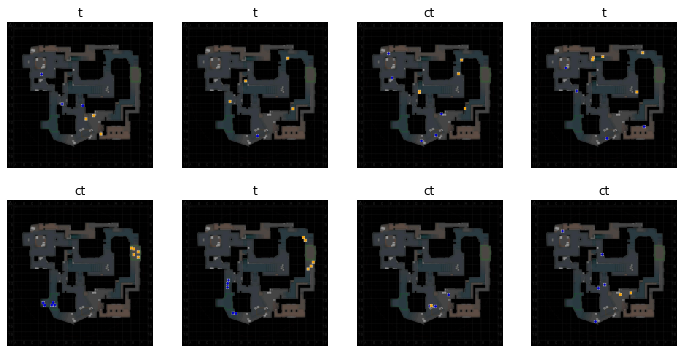

In [ ]:
train_mixed_dl.show_batch()



In [ ]:
class CustomMixedModel(nn.Module):
    def __init__(self, resNet):
        super(CustomMixedModel,self).__init__()
        self.resNet = resNet
        #self.classifier = TabularModel_NoCat(emb_sizes,1536, 30,[400],ps=[0.1],use_bn=False)
        emb_sizes=[(30,7),(11,3),(4,2)]
        self.embeds = nn.ModuleList([Embedding(ni, nf) for ni, nf in emb_sizes])
        #n_emb = sum(e.embedding_dim for e in self.embeds)
        self.intermediate_linear = nn.Sequential(torch.nn.Linear(110,400),nn.ReLU())
        self.classifier=torch.nn.Linear(1400,2)

        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, input_cat,input_cont,input_image):
        main_weapon_fields = L([i*8 for i in range(10)])
        sec_weapon_fields = L([i*8+1 for i in range(10)])
        flash_fields = L([i*8+2] for i in range(10))
        other_fields = [i for i in range(80) if i not in main_weapon_fields+
            sec_weapon_fields+flash_fields]
        main_weapon_input = input_cat[:,main_weapon_fields]
        sec_weapon_input = input_cat[:,sec_weapon_fields]
        flash_input = input_cat[:,flash_fields]
        other_fields = input_cat[:,other_fields].float()
        main_weapon_input = self.embeds[0](main_weapon_input)
        sec_weapon_input = self.embeds[1](sec_weapon_input)
        flash_input = self.embeds[2](flash_input)
        output_image =self.resNet(input_image)
        output_tabular = self.intermediate_linear(torch.cat((main_weapon_input, sec_weapon_input,
            flash_input,other_fields,input_cont), dim=1))

        output=self.dropout(torch.cat((output_tabular, output_image), dim=1))

        logits = self.classifier(output)
        return logits



In [ ]:
image_model =xresnet34()
image_model.to("cuda:0")
model = CustomMixedModel(image_model)
model = model.to("cuda:0")



In [ ]:
now= datetime.datetime.now()
creation_time = now.strftime("%H:%M")
writer = SummaryWriter( os.path.expanduser('~/projetos/data/csgo_analyze/experiment/tensorboard/')+
                        now.strftime("%Y-%m-%d"))
class TensorboardCallback(Callback):
    def __init__(self,tensorboard_writer,creation_time,lr_sequence,with_input=False,
                 with_loss=True, save_preds=False, save_targs=False, concat_dim=0):
        store_attr(self, "with_input,with_loss,save_preds,save_targs,concat_dim")
        self.tensorboard_writer=tensorboard_writer
        self.count=0
        self.creation_time = creation_time
        self.lr_sequence=lr_sequence

    def begin_batch(self):
        if self.with_input: self.inputs.append((to_detach(self.xb)))

    def begin_validate(self):
        "Initialize containers"
        # self.preds,self.targets = [],[]
        # if self.with_input: self.inputs = []
        if self.with_loss:  
            self.losses = []
            self.accuracy=[]

    def after_batch(self):
        if not self.training:
            "Save predictions, targets and potentially losses"

            # preds,targs = to_detach(self.pred),to_detach(self.yb)
            # if self.save_preds is None: self.preds.append(preds)
            # else: (self.save_preds/str(self.iter)).save_array(preds)
            # if self.save_targs is None: self.targets.append(targs)
            # else: (self.save_targs/str(self.iter)).save_array(targs[0])
            if self.with_loss:
                self.accuracy.append(self.metrics[0].value)
                self.losses.append(to_detach(self.loss))
    def after_validate(self):
        "Concatenate all recorded tensors"
        # if self.with_input:     self.inputs  = detuplify(to_concat(self.inputs, dim=self.concat_dim))
        # if not self.save_preds: self.preds   = detuplify(to_concat(self.preds, dim=self.concat_dim))
        # if not self.save_targs: self.targets = detuplify(to_concat(self.targets, dim=self.concat_dim))

        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" loss: ",self.recorder.log[self.recorder.metric_names.index("valid_loss")],self.count)
        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" accuracy: ",self.recorder.log[self.recorder.metric_names.index("accuracy")],self.count)
        self.count+=1

    def all_tensors(self):
        res = [None if self.save_preds else self.preds, None if self.save_targs else self.targets]
        if self.with_input: res = [self.inputs] + res
        if self.with_loss:  res.append(self.losses)
        return res

lr_sequence = [5e-3,5e-4,5e-5]
tensorboardcb = TensorboardCallback(writer,creation_time,lr_sequence)



In [ ]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy,cbs=[tensorboardcb])



In [ ]:
for lr in lr_sequence:
    learn.fit_one_cycle(2, lr)



RuntimeError: Tensors must have same number of dimensions: got 2 and 3

In [ ]:
class CustomMixedModel(nn.Module):
    def __init__(self, resNet):
        super(CustomMixedModel,self).__init__()
        self.resNet = resNet
        #self.classifier = TabularModel_NoCat(emb_sizes,1536, 30,[400],ps=[0.1],use_bn=False)
        emb_sizes=[(30,7),(11,3),(4,2)]
        self.embeds = nn.ModuleList([Embedding(ni, nf) for ni, nf in emb_sizes])
        #n_emb = sum(e.embedding_dim for e in self.embeds)
        self.intermediate_linear = nn.Sequential(torch.nn.Linear(110,400),nn.ReLU())
        self.classifier=torch.nn.Linear(1400,2)

        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, input_cat,input_cont,input_image):
        main_weapon_fields = L([i*8 for i in range(10)])
        sec_weapon_fields = L([i*8+1 for i in range(10)])
        flash_fields = L([i*8+2] for i in range(10))
        other_fields = [i for i in range(80) if i not in main_weapon_fields+
            sec_weapon_fields+flash_fields]
        main_weapon_input = input_cat[:,main_weapon_fields]
        sec_weapon_input = input_cat[:,sec_weapon_fields]
        flash_input = input_cat[:,flash_fields]
        other_fields = input_cat[:,other_fields].float()
        main_weapon_input = self.embeds[0](main_weapon_input)
        sec_weapon_input = self.embeds[1](sec_weapon_input)
        flash_input = self.embeds[2](flash_input)
        output_image =self.resNet(input_image)
        output_tabular = self.intermediate_linear(torch.cat((main_weapon_input, sec_weapon_input,
            flash_input,other_fields,input_cont), dim=1))

        output=self.dropout(torch.cat((output_tabular, output_image), dim=1))

        logits = self.classifier(output)
        return logits



In [ ]:
image_model =xresnet34()
image_model.to("cuda:0")
model = CustomMixedModel(image_model)
model = model.to("cuda:0")



In [ ]:
now= datetime.datetime.now()
creation_time = now.strftime("%H:%M")
writer = SummaryWriter( os.path.expanduser('~/projetos/data/csgo_analyze/experiment/tensorboard/')+
                        now.strftime("%Y-%m-%d"))
class TensorboardCallback(Callback):
    def __init__(self,tensorboard_writer,creation_time,lr_sequence,with_input=False,
                 with_loss=True, save_preds=False, save_targs=False, concat_dim=0):
        store_attr(self, "with_input,with_loss,save_preds,save_targs,concat_dim")
        self.tensorboard_writer=tensorboard_writer
        self.count=0
        self.creation_time = creation_time
        self.lr_sequence=lr_sequence

    def begin_batch(self):
        if self.with_input: self.inputs.append((to_detach(self.xb)))

    def begin_validate(self):
        "Initialize containers"
        # self.preds,self.targets = [],[]
        # if self.with_input: self.inputs = []
        if self.with_loss:  
            self.losses = []
            self.accuracy=[]

    def after_batch(self):
        if not self.training:
            "Save predictions, targets and potentially losses"

            # preds,targs = to_detach(self.pred),to_detach(self.yb)
            # if self.save_preds is None: self.preds.append(preds)
            # else: (self.save_preds/str(self.iter)).save_array(preds)
            # if self.save_targs is None: self.targets.append(targs)
            # else: (self.save_targs/str(self.iter)).save_array(targs[0])
            if self.with_loss:
                self.accuracy.append(self.metrics[0].value)
                self.losses.append(to_detach(self.loss))
    def after_validate(self):
        "Concatenate all recorded tensors"
        # if self.with_input:     self.inputs  = detuplify(to_concat(self.inputs, dim=self.concat_dim))
        # if not self.save_preds: self.preds   = detuplify(to_concat(self.preds, dim=self.concat_dim))
        # if not self.save_targs: self.targets = detuplify(to_concat(self.targets, dim=self.concat_dim))

        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" loss: ",self.recorder.log[self.recorder.metric_names.index("valid_loss")],self.count)
        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" accuracy: ",self.recorder.log[self.recorder.metric_names.index("accuracy")],self.count)
        self.count+=1

    def all_tensors(self):
        res = [None if self.save_preds else self.preds, None if self.save_targs else self.targets]
        if self.with_input: res = [self.inputs] + res
        if self.with_loss:  res.append(self.losses)
        return res

lr_sequence = [5e-3,5e-4,5e-5]
tensorboardcb = TensorboardCallback(writer,creation_time,lr_sequence)



In [ ]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy,cbs=[tensorboardcb])



In [ ]:
breakpoint()
for lr in lr_sequence:
    learn.fit_one_cycle(2, lr)



RuntimeError: Tensors must have same number of dimensions: got 2 and 3

In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%

%load_ext autoreload
%autoreload 2



In [ ]:
# default_exp core


 # module name here

 > API details.

In [ ]:
#hide
from nbdev.showdoc import *



In [ ]:
from fastai2.tabular.all import *
from fastai2.vision.all import *
from fastai2.data.load import _FakeLoader, _loaders
import pandas as pd
from torch.utils.tensorboard import SummaryWriter
import datetime



In [ ]:
from fastai2.data.load import _FakeLoader, _loaders
class MixedDL():
    def __init__(self, tab_dl:TabDataLoader, vis_dl:TfmdDL, device='cuda:0'):
        "Stores away `tab_dl` and `vis_dl`, and overrides `shuffle_fn`"
        self.device = device
        tab_dl.shuffle_fn = self.shuffle_fn
        vis_dl.shuffle_fn = self.shuffle_fn
        self.dls = [tab_dl, vis_dl]
        self.count = 0
        self.fake_l = _FakeLoader(self, False, 0, 0)



In [ ]:
@patch
def shuffle_fn(x:MixedDL, idxs):
        "Generates a new `rng` based upon which `DataLoader` is called"
        if x.count == 0: # if we haven't generated an rng yet
            x.rng = x.dls[0].rng.sample(idxs, len(idxs))
            x.count += 1
            return x.rng
        else:
            x.count = 0
            return x.rng

@patch
def __iter__(dl:MixedDL):
        "Iterate over your `DataLoader`"
        z = zip(*[_loaders[i.fake_l.num_workers==0](i.fake_l) for i in dl.dls])
        for b in z:
            if dl.device is not None:
                b = to_device(b, dl.device)
            batch = []
            batch.extend(dl.dls[0].after_batch(b[0])[:2]) # tabular cat and cont
            batch.append(dl.dls[1].after_batch(b[1][0])) # Image
            batch.append(b[1][1]) # y
            yield tuple(batch)

@patch
def one_batch(x:MixedDL):
        "Grab a batch from the `DataLoader`"
        with x.fake_l.no_multiproc(): res = first(x)
        if hasattr(x, 'it'): delattr(x, 'it')
        return res

@patch
def __len__(x:MixedDL): return len(x.dls[0])

@patch
def to(x:MixedDL, device): x.device = device

@patch
def show_batch(x:MixedDL):
    "Show a batch from multiple `DataLoaders`"
    for dl in x.dls:
        dl.show_batch()

@patch
def show_results(x:MixedDL,b,out,**kwargs):
    "Show a batch from multiple `DataLoaders`"
    for i,dl in enumerate(x.dls):
        if i == 0:
            dl.show_results(b=b[:2]+(b[3],),out=out,**kwargs)
        else:
            dl.show_results(b=b[2:],out=out,**kwargs)

@patch
def new(x:MixedDL,*args,**kwargs):
    "Show a batch from multiple `DataLoaders`"
    new_dls = [dl.new(*args,**kwargs) for dl in x.dls]
    res=MixedDL(*new_dls)
    return res



In [ ]:
path = "/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage"
image_files = get_image_files(path)
tabular_files = get_files(path, extensions=['.csv'])
print(len(image_files))
print(len(tabular_files))



11965
258


In [ ]:
def fileLabeller(o,**kwargs):
    winnerFile = Path(o).parent/"winner.txt"
    if os.path.isfile(winnerFile):
        f = open(winnerFile, "r")
        winner = f.readline()
        f.close()
    else:
        winner="na"
    return winner

print(image_files[0])
print(fileLabeller(image_files[0]))



/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage/6/ct_2_t_3/output_map16.jpg
ct


In [ ]:
columns = ["t_1","t_2","t_3","t_4","t_5","ct_1","ct_2","ct_3","ct_4","ct_5","t_1_mainweapon", "t_1_secweapon", "t_1_flashbangs", "t_1_hassmoke", "t_1_hasmolotov", "t_1_hashe", "t_1_armor", "t_1_hashelmet", "t_1_hasc4",
		"t_2_mainweapon", "t_2_secweapon", "t_2_flashbangs", "t_2_hassmoke", "t_2_hasmolotov", "t_2_hashe", "t_2_armor", "t_2_hashelmet", "t_2_hasc4",
		"t_3_mainweapon", "t_3_secweapon", "t_3_flashbangs", "t_3_hassmoke", "t_3_hasmolotov", "t_3_hashe", "t_3_armor", "t_3_hashelmet", "t_3_hasc4",
		"t_4_mainweapon", "t_4_secweapon", "t_4_flashbangs", "t_4_hassmoke", "t_4_hasmolotov", "t_4_hashe", "t_4_armor", "t_4_hashelmet", "t_4_hasc4",
		"t_5_mainweapon", "t_5_secweapon", "t_5_flashbangs", "t_5_hassmoke", "t_5_hasmolotov", "t_5_hashe", "t_5_armor", "t_5_hashelmet", "t_5_hasc4",
		"ct_1_mainweapon", "ct_1_secweapon", "ct_1_flashbangs", "ct_1_hassmoke", "ct_1_hasmolotov", "ct_1_hashe", "ct_1_armor", "ct_1_hashelmet", "ct_1_hasdefusekit",
		"ct_2_mainweapon", "ct_2_secweapon", "ct_2_flashbangs", "ct_2_hassmoke", "ct_2_hasmolotov", "ct_2_hashe", "ct_2_armor", "ct_2_hashelmet", "ct_2_hasdefusekit",
		"ct_3_mainweapon", "ct_3_secweapon", "ct_3_flashbangs", "ct_3_hassmoke", "ct_3_hasmolotov", "ct_3_hashe", "ct_3_armor", "ct_3_hashelmet", "ct_3_hasdefusekit",
		"ct_4_mainweapon", "ct_4_secweapon", "ct_4_flashbangs", "ct_4_hassmoke", "ct_4_hasmolotov", "ct_4_hashe", "ct_4_armor", "ct_4_hashelmet", "ct_4_hasdefusekit",
		"ct_5_mainweapon", "ct_5_secweapon", "ct_5_flashbangs", "ct_5_hassmoke", "ct_5_hasmolotov", "ct_5_hashe", "ct_5_armor", "ct_5_hashelmet", "ct_5_hasdefusekit",
        'related_image','winner']
full_csv = pd.DataFrame(columns=columns)
for tab_file in tabular_files:
    if not os.stat(tab_file).st_size == 0 and os.path.isfile(tab_file.parent/"winner.txt"):
        new_csv = pd.read_csv(tab_file)
        new_csv['index']=new_csv.index
        new_csv['related_image'] = str(tab_file.parent)+"/output_map"+new_csv['index'].astype(str)+".jpg"
        new_csv['winner'] = fileLabeller(tab_file)
        new_csv=new_csv.drop(columns=["index"])
        new_csv.columns=columns
        full_csv=full_csv.append(new_csv)



In [ ]:
filtered_image_files = L()
for image_file in image_files:
    if fileLabeller(image_file) in ["t","ct"] and not os.stat(image_file.parent/"tabular.csv").st_size == 0 and str(image_file) in full_csv['related_image'].values:
        filtered_image_files.append(image_file)



In [ ]:
def roundSplitter(filtered_image_files):
    uniqueList = list(set([Path(o).parent for o in filtered_image_files]))
    splits=RandomSplitter()(uniqueList)
    train_image_files=L()
    valid_image_files=L()
    for i,o in enumerate(filtered_image_files):
        if uniqueList.index(Path(o).parent) in splits[0]:
            train_image_files+=i
        else:
            valid_image_files+=i
    return train_image_files,valid_image_files



In [ ]:
filtered_image_files.sort()
full_csv=full_csv.sort_values(by=['related_image'])
#filtered_image_files=filtered_image_files[:2000]
#full_csv=full_csv.iloc[:2000,:]
splits=roundSplitter(filtered_image_files)



In [ ]:
print(filtered_image_files[55])
full_csv.iloc[55,:]



/home/marcel/projetos/data/csgo_analyze/processed_test/de_mirage/10/ct_0_t_1/output_map59.jpg


t_1                                                                                                           0.65
t_2                                                                                                              0
t_3                                                                                                           0.37
t_4                                                                                                              0
t_5                                                                                                              0
                                                                 ...                                              
ct_5_armor                                                                                                       0
ct_5_hashelmet                                                                                                   0
ct_5_hasdefusekit                                                               

In [ ]:
cont_names = ['t_1', 't_2','t_3','t_4','t_5',
    'ct_1','ct_2','ct_3','ct_4','ct_5',
    "t_1_armor","t_2_armor","t_3_armor","t_4_armor","t_5_armor",
    "ct_1_armor","ct_2_armor","ct_3_armor","ct_4_armor","ct_5_armor"]
cat_names = ["t_1_mainweapon", "t_1_secweapon", "t_1_flashbangs", "t_1_hassmoke", "t_1_hasmolotov", "t_1_hashe", "t_1_hashelmet", "t_1_hasc4",
		"t_2_mainweapon", "t_2_secweapon", "t_2_flashbangs", "t_2_hassmoke", "t_2_hasmolotov", "t_2_hashe", "t_2_hashelmet", "t_2_hasc4",
		"t_3_mainweapon", "t_3_secweapon", "t_3_flashbangs", "t_3_hassmoke", "t_3_hasmolotov", "t_3_hashe", "t_3_hashelmet", "t_3_hasc4",
		"t_4_mainweapon", "t_4_secweapon", "t_4_flashbangs", "t_4_hassmoke", "t_4_hasmolotov", "t_4_hashe", "t_4_hashelmet", "t_4_hasc4",
		"t_5_mainweapon", "t_5_secweapon", "t_5_flashbangs", "t_5_hassmoke", "t_5_hasmolotov", "t_5_hashe", "t_5_hashelmet", "t_5_hasc4",
		"ct_1_mainweapon", "ct_1_secweapon", "ct_1_flashbangs", "ct_1_hassmoke", "ct_1_hasmolotov", "ct_1_hashe", "ct_1_hashelmet", "ct_1_hasdefusekit",
		"ct_2_mainweapon", "ct_2_secweapon", "ct_2_flashbangs", "ct_2_hassmoke", "ct_2_hasmolotov", "ct_2_hashe", "ct_2_hashelmet", "ct_2_hasdefusekit",
		"ct_3_mainweapon", "ct_3_secweapon", "ct_3_flashbangs", "ct_3_hassmoke", "ct_3_hasmolotov", "ct_3_hashe", "ct_3_hashelmet", "ct_3_hasdefusekit",
		"ct_4_mainweapon", "ct_4_secweapon", "ct_4_flashbangs", "ct_4_hassmoke", "ct_4_hasmolotov", "ct_4_hashe", "ct_4_hashelmet", "ct_4_hasdefusekit",
		"ct_5_mainweapon", "ct_5_secweapon", "ct_5_flashbangs", "ct_5_hassmoke", "ct_5_hasmolotov", "ct_5_hashe", "ct_5_hashelmet", "ct_5_hasdefusekit"]
for cat in cont_names:
    full_csv[cat]=full_csv[cat].astype(np.float)
procs = [Categorify, Normalize]
dls_tabular = TabularDataLoaders.from_df(full_csv, path, procs=procs, cont_names=cont_names,cat_names=cat_names,
                                 y_names="winner", bs=8,valid_idx=splits[1],device=torch.device('cuda:0'))



In [ ]:

dsets = Datasets(filtered_image_files, [[PILImage.create], [fileLabeller, Categorize]],splits=splits)
item_tfms = [Resize(200),ToTensor]
batch_tfms = [IntToFloatTensor, Normalize.from_stats(*imagenet_stats)]
dls_image = dsets.dataloaders(after_item=item_tfms, after_batch=batch_tfms, bs=8, num_workers=8,device=torch.device("cuda"))



In [ ]:
train_mixed_dl = MixedDL(dls_tabular.train, dls_image.train)
train_mixed_dl.to(torch.device('cuda:0'))
valid_mixed_dl = MixedDL(dls_tabular.valid,dls_image.valid)
valid_mixed_dl.to(torch.device('cuda:0'))
dls = DataLoaders(train_mixed_dl, valid_mixed_dl,device=torch.device('cuda:0'))



In [ ]:
dls_image.one_batch()



(TensorImage([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           ...,
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.0665, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.0837, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.0837, -2.1008]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           ...,
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -1.9832, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0007, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0007, -2.0182]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
        

In [ ]:
dls_tabular.one_batch()



(tensor([[ 8,  2,  2,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  8,  3,  1,  1,  1,  1,  2,  1,  4,  2,  3,  1,
           1,  1,  2,  1,  8,  8,  2,  1,  1,  1,  2,  1,  6, 10,  2,  1,  2,  1,
           2,  1, 13,  7,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           7,  9,  2,  1,  1,  1,  2,  1],
         [11,  2,  2,  1,  1,  1,  1,  1,  6,  2,  2,  2,  1,  1,  2,  1,  7,  2,
           2,  2,  1,  1,  2,  1,  8,  3,  2,  1,  2,  1,  2,  2,  4,  2,  3,  2,
           2,  1,  2,  1,  8,  2,  2,  2,  2,  2,  2,  1,  7, 10,  3,  2,  1,  1,
           2,  1, 13,  7,  2,  2,  2,  2,  2,  1,  7,  9,  2,  2,  2,  1,  2,  1,
           6,  5,  2,  2,  2,  2,  2,  1],
         [ 8,  2,  1,  2,  1,  1,  2,  1,  6,  2,  3,  2,  2,  1,  2,  1,  7,  2,
           3,  2,  2,  1,  2,  1, 12,  3,  3,  2,  2,  1,  2,  1,  4,  2,  1,  2,
           2,  1,  2,  1, 12,  2,  2,  2,  2,  2,  1,  1,  7, 10,  3,  2,  2,  1,
           1

In [ ]:
b=train_mixed_dl.one_batch()
b



(tensor([[ 8,  4,  2,  1,  2,  2,  2,  1, 11,  4,  1,  1,  1,  1,  2,  2,  7,  4,
           2,  1,  1,  1,  2,  1,  8,  5,  2,  1,  1,  1,  2,  1,  4,  2,  3,  1,
           2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1, 11,  7,  1,  1,  1,  1,  2,  1,  7,  9,  3,  2,  1,  2,  2,  1,
           7,  9,  2,  2,  1,  1,  2,  1],
         [ 8,  2,  1,  2,  1,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  6,  3,  1,  1,  2,  2,  2,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  8,  8,  1,  1,  1,  1,  2,  1, 11, 10,  2,  1,  1,  1,
           1,  1,  9,  7,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           7,  9,  1,  2,  1,  1,  2,  1],
         [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  2,
           2,  2,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  2,  3,  1,
           2,  1,  2,  1,  8,  8,  3,  1,  1,  1,  2,  1,  6,  5,  2,  1,  1,  2,
           2

,t_1_mainweapon,t_1_secweapon,t_1_flashbangs,t_1_hassmoke,t_1_hasmolotov,t_1_hashe,t_1_hashelmet,t_1_hasc4,t_2_mainweapon,t_2_secweapon,t_2_flashbangs,t_2_hassmoke,t_2_hasmolotov,t_2_hashe,t_2_hashelmet,t_2_hasc4,t_3_mainweapon,t_3_secweapon,t_3_flashbangs,t_3_hassmoke,t_3_hasmolotov,t_3_hashe,t_3_hashelmet,t_3_hasc4,t_4_mainweapon,t_4_secweapon,t_4_flashbangs,t_4_hassmoke,t_4_hasmolotov,t_4_hashe,t_4_hashelmet,t_4_hasc4,t_5_mainweapon,t_5_secweapon,t_5_flashbangs,t_5_hassmoke,t_5_hasmolotov,t_5_hashe,t_5_hashelmet,t_5_hasc4,ct_1_mainweapon,ct_1_secweapon,ct_1_flashbangs,ct_1_hassmoke,ct_1_hasmolotov,ct_1_hashe,ct_1_hashelmet,ct_1_hasdefusekit,ct_2_mainweapon,ct_2_secweapon,ct_2_flashbangs,ct_2_hassmoke,ct_2_hasmolotov,ct_2_hashe,ct_2_hashelmet,ct_2_hasdefusekit,ct_3_mainweapon,ct_3_secweapon,ct_3_flashbangs,ct_3_hassmoke,ct_3_hasmolotov,ct_3_hashe,ct_3_hashelmet,ct_3_hasdefusekit,ct_4_mainweapon,ct_4_secweapon,ct_4_flashbangs,ct_4_hassmoke,ct_4_hasmolotov,ct_4_hashe,ct_4_hashelmet,ct_4_hasdefusekit,ct_5_mainweapon,ct_5_secweapon,ct_5_flashbangs,ct_5_hassmoke,ct_5_hasmolotov,ct_5_hashe,ct_5_hashelmet,ct_5_hasdefusekit,t_1,t_2,t_3,t_4,t_5,ct_1,ct_2,ct_3,ct_4,ct_5,t_1_armor,t_2_armor,t_3_armor,t_4_armor,t_5_armor,ct_1_armor,ct_2_armor,ct_3_armor,ct_4_armor,ct_5_armor,winner
0,303,4,1,0,1,1,1,0,309,4,0,0,0,0,1,1,303,4,1,0,0,0,1,0,303,4,1,0,0,0,1,0,303,2,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,306,9,0,0,0,0,1,0,304,9,2,1,0,1,1,0,304,9,1,1,0,0,1,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.720933e-08,1.819222e-08,1.00,1.000000e+00,1.000000e+00,1.000000e+02,100.000001,1.000000e+02,1.000000e+02,100.000000,0.000003,2.064007e-08,100.000001,98.000001,99.999999,t
1,303,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,301,2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,304,9,0,0,0,0,1,0,309,9,1,0,0,0,0,0,304,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,304,9,0,1,0,0,1,0,1.900000e-01,-2.538048e-08,-1.399142e-08,5.800000e-01,1.106696e-08,1.000000e+00,1.000000e+00,1.00,6.188500e-09,1.000000e+00,8.200000e+01,0.000001,-9.591868e-07,9.000000e+01,0.000002,99.999999,1.000000e+02,100.000001,-0.000001,99.999999,ct
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,303,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,303,2,2,0,1,0,1,0,304,9,2,0,0,0,1,0,303,4,1,0,0,1,1,0,309,4,2,1,1,0,1,0,0,0,0,0,0,0,0,0,304,9,0,0,1,1,1,0,-2.147672e-09,-2.538048e-08,1.000000e+00,-5.194948e-09,1.000000e+00,1.000000e+00,1.000000e+00,0.94,6.188500e-09,1.000000e+00,-5.835682e-07,0.000001,1.000000e+02,-4.418962e-07,100.000000,98.000001,1.000000e+02,100.000001,-0.000001,86.000000,ct
3,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0,3,0,0,0,0,0,0,308,9,1,1,1,1,1,0,309,9,1,1,0,1,1,0,102,9,1,1,1,0,1,0,304,9,1,1,1,1,1,0,303,9,2,1,1,0,1,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,1.000000e+00,1.000000e+00,-5.835682e-07,0.000001,1.000000e+02,-4.418962e-07,0.000002,99.999999,1.000000e+02,100.000001,100.000001,99.999999,ct
4,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,6,0,0,0,1,0,0,0,9,1,1,0,1,0,0,0,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,1.000000e+00,1.000000e+00,1.000000e+02,100.000001,1.000000e+02,-4.418962e-07,100.000000,99.999999,2.064007e-08,0.000002,100.000001,99.999999,ct
5,104,2,1,0,1,0,1,0,303,9,1,0,1,0,1,1,303,2,0,1,1,0,1,0,303,9,0,0,0,0,1,0,303,9,1,1,0,0,1,0,0,9,0,0,0,0,0,0,0,4,0,0,0,0,0,0,306,9,0,0,0,1,0,0,0,4,0,0,0,0,1,0,306,9,0,0,0,0,0,0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,4.200000e-01,1.000000e+00,7.600000e+01,91.000000,1.000000e+02,9.000000e+01,90.000001,0.000003,9.900000e+01,0.000002,61.000000,-0.000002,t
6,303,3,1,1,1,0,1,0,303,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,309,2,0,1,0,0,1,0,303,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,309,9,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,4,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1.000000e+00,1.000000e+00,-1.399142e-08,1.000000e-01,1.000000e+00,

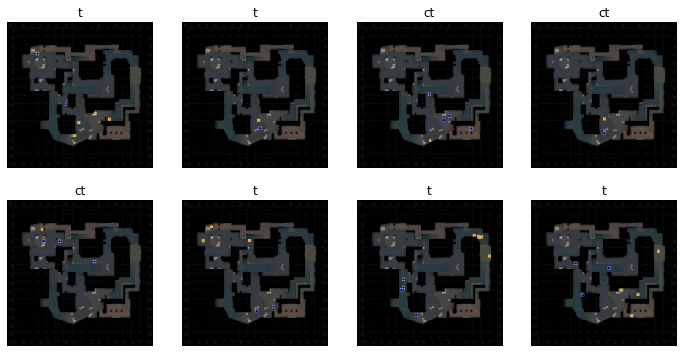

In [ ]:
train_mixed_dl.show_batch()



In [ ]:
class CustomMixedModel(nn.Module):
    def __init__(self, resNet):
        super(CustomMixedModel,self).__init__()
        self.resNet = resNet
        #self.classifier = TabularModel_NoCat(emb_sizes,1536, 30,[400],ps=[0.1],use_bn=False)
        emb_sizes=[(30,5),(11,3),(4,2)]
        self.embeds = nn.ModuleList([Embedding(ni, nf) for ni, nf in emb_sizes])
        #n_emb = sum(e.embedding_dim for e in self.embeds)
        self.intermediate_linear = nn.Sequential(torch.nn.Linear(110,400),nn.ReLU())
        self.classifier=torch.nn.Linear(1400,2)

        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, input_cat,input_cont,input_image):
        main_weapon_fields = L([i*8 for i in range(10)])
        sec_weapon_fields = L([i*8+1 for i in range(10)])
        flash_fields = L([i*8+2] for i in range(10))
        other_fields = [i for i in range(80) if i not in main_weapon_fields+
            sec_weapon_fields+flash_fields]
        main_weapon_input = input_cat[:,main_weapon_fields]
        sec_weapon_input = input_cat[:,sec_weapon_fields]
        flash_input = input_cat[:,flash_fields]
        other_fields = input_cat[:,other_fields].float()
        main_weapon_input = torch.flatten(self.embeds[0](main_weapon_input), start_dim=1)
        
        sec_weapon_input = torch.flatten(self.embeds[1](sec_weapon_input), start_dim=1)
        flash_input = torch.flatten(self.embeds[2](flash_input), start_dim=1)
        output_image =self.resNet(input_image)
        output_tabular = self.intermediate_linear(torch.cat((main_weapon_input, sec_weapon_input,
            flash_input,other_fields,input_cont), dim=1))

        output=self.dropout(torch.cat((output_tabular, output_image), dim=1))

        logits = self.classifier(output)
        return logits



In [ ]:
image_model =xresnet34()
image_model.to("cuda:0")
model = CustomMixedModel(image_model)
model = model.to("cuda:0")



In [ ]:
now= datetime.datetime.now()
creation_time = now.strftime("%H:%M")
writer = SummaryWriter( os.path.expanduser('~/projetos/data/csgo_analyze/experiment/tensorboard/')+
                        now.strftime("%Y-%m-%d"))
class TensorboardCallback(Callback):
    def __init__(self,tensorboard_writer,creation_time,lr_sequence,with_input=False,
                 with_loss=True, save_preds=False, save_targs=False, concat_dim=0):
        store_attr(self, "with_input,with_loss,save_preds,save_targs,concat_dim")
        self.tensorboard_writer=tensorboard_writer
        self.count=0
        self.creation_time = creation_time
        self.lr_sequence=lr_sequence

    def begin_batch(self):
        if self.with_input: self.inputs.append((to_detach(self.xb)))

    def begin_validate(self):
        "Initialize containers"
        # self.preds,self.targets = [],[]
        # if self.with_input: self.inputs = []
        if self.with_loss:  
            self.losses = []
            self.accuracy=[]

    def after_batch(self):
        if not self.training:
            "Save predictions, targets and potentially losses"

            # preds,targs = to_detach(self.pred),to_detach(self.yb)
            # if self.save_preds is None: self.preds.append(preds)
            # else: (self.save_preds/str(self.iter)).save_array(preds)
            # if self.save_targs is None: self.targets.append(targs)
            # else: (self.save_targs/str(self.iter)).save_array(targs[0])
            if self.with_loss:
                self.accuracy.append(self.metrics[0].value)
                self.losses.append(to_detach(self.loss))
    def after_validate(self):
        "Concatenate all recorded tensors"
        # if self.with_input:     self.inputs  = detuplify(to_concat(self.inputs, dim=self.concat_dim))
        # if not self.save_preds: self.preds   = detuplify(to_concat(self.preds, dim=self.concat_dim))
        # if not self.save_targs: self.targets = detuplify(to_concat(self.targets, dim=self.concat_dim))

        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" loss: ",self.recorder.log[self.recorder.metric_names.index("valid_loss")],self.count)
        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" accuracy: ",self.recorder.log[self.recorder.metric_names.index("accuracy")],self.count)
        self.count+=1

    def all_tensors(self):
        res = [None if self.save_preds else self.preds, None if self.save_targs else self.targets]
        if self.with_input: res = [self.inputs] + res
        if self.with_loss:  res.append(self.losses)
        return res

lr_sequence = [5e-3,5e-4,5e-5]
tensorboardcb = TensorboardCallback(writer,creation_time,lr_sequence)



In [ ]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy,cbs=[tensorboardcb])



In [ ]:
breakpoint()
for lr in lr_sequence:
    learn.fit_one_cycle(2, lr)



RuntimeError: size mismatch, m1: [8 x 180], m2: [110 x 400] at /opt/conda/conda-bld/pytorch_1591914855613/work/aten/src/THC/generic/THCTensorMathBlas.cu:283

In [ ]:
class CustomMixedModel(nn.Module):
    def __init__(self, resNet):
        super(CustomMixedModel,self).__init__()
        self.resNet = resNet
        #self.classifier = TabularModel_NoCat(emb_sizes,1536, 30,[400],ps=[0.1],use_bn=False)
        emb_sizes=[(30,5),(11,3),(4,2)]
        self.embeds = nn.ModuleList([Embedding(ni, nf) for ni, nf in emb_sizes])
        #n_emb = sum(e.embedding_dim for e in self.embeds)
        self.intermediate_linear = nn.Sequential(torch.nn.Linear(180,400),nn.ReLU())
        self.classifier=torch.nn.Linear(1400,2)

        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, input_cat,input_cont,input_image):
        main_weapon_fields = L([i*8 for i in range(10)])
        sec_weapon_fields = L([i*8+1 for i in range(10)])
        flash_fields = L([i*8+2] for i in range(10))
        other_fields = [i for i in range(80) if i not in main_weapon_fields+
            sec_weapon_fields+flash_fields]
        main_weapon_input = input_cat[:,main_weapon_fields]
        sec_weapon_input = input_cat[:,sec_weapon_fields]
        flash_input = input_cat[:,flash_fields]
        other_fields = input_cat[:,other_fields].float()
        main_weapon_input = torch.flatten(self.embeds[0](main_weapon_input), start_dim=1)
        
        sec_weapon_input = torch.flatten(self.embeds[1](sec_weapon_input), start_dim=1)
        flash_input = torch.flatten(self.embeds[2](flash_input), start_dim=1)
        output_image =self.resNet(input_image)
        output_tabular = self.intermediate_linear(torch.cat((main_weapon_input, sec_weapon_input,
            flash_input,other_fields,input_cont), dim=1))

        output=self.dropout(torch.cat((output_tabular, output_image), dim=1))

        logits = self.classifier(output)
        return logits



In [ ]:
image_model =xresnet34()
image_model.to("cuda:0")
model = CustomMixedModel(image_model)
model = model.to("cuda:0")



In [ ]:
now= datetime.datetime.now()
creation_time = now.strftime("%H:%M")
writer = SummaryWriter( os.path.expanduser('~/projetos/data/csgo_analyze/experiment/tensorboard/')+
                        now.strftime("%Y-%m-%d"))
class TensorboardCallback(Callback):
    def __init__(self,tensorboard_writer,creation_time,lr_sequence,with_input=False,
                 with_loss=True, save_preds=False, save_targs=False, concat_dim=0):
        store_attr(self, "with_input,with_loss,save_preds,save_targs,concat_dim")
        self.tensorboard_writer=tensorboard_writer
        self.count=0
        self.creation_time = creation_time
        self.lr_sequence=lr_sequence

    def begin_batch(self):
        if self.with_input: self.inputs.append((to_detach(self.xb)))

    def begin_validate(self):
        "Initialize containers"
        # self.preds,self.targets = [],[]
        # if self.with_input: self.inputs = []
        if self.with_loss:  
            self.losses = []
            self.accuracy=[]

    def after_batch(self):
        if not self.training:
            "Save predictions, targets and potentially losses"

            # preds,targs = to_detach(self.pred),to_detach(self.yb)
            # if self.save_preds is None: self.preds.append(preds)
            # else: (self.save_preds/str(self.iter)).save_array(preds)
            # if self.save_targs is None: self.targets.append(targs)
            # else: (self.save_targs/str(self.iter)).save_array(targs[0])
            if self.with_loss:
                self.accuracy.append(self.metrics[0].value)
                self.losses.append(to_detach(self.loss))
    def after_validate(self):
        "Concatenate all recorded tensors"
        # if self.with_input:     self.inputs  = detuplify(to_concat(self.inputs, dim=self.concat_dim))
        # if not self.save_preds: self.preds   = detuplify(to_concat(self.preds, dim=self.concat_dim))
        # if not self.save_targs: self.targets = detuplify(to_concat(self.targets, dim=self.concat_dim))

        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" loss: ",self.recorder.log[self.recorder.metric_names.index("valid_loss")],self.count)
        self.tensorboard_writer.add_scalar(self.creation_time+" lr: "+str(self.lr_sequence)+" accuracy: ",self.recorder.log[self.recorder.metric_names.index("accuracy")],self.count)
        self.count+=1

    def all_tensors(self):
        res = [None if self.save_preds else self.preds, None if self.save_targs else self.targets]
        if self.with_input: res = [self.inputs] + res
        if self.with_loss:  res.append(self.losses)
        return res

lr_sequence = [5e-3,5e-4,5e-5]
tensorboardcb = TensorboardCallback(writer,creation_time,lr_sequence)



In [ ]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy,cbs=[tensorboardcb])



In [ ]:
for lr in lr_sequence:
    learn.fit_one_cycle(2, lr)



KeyboardInterrupt: 